In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.getcwd()
path

'/home/alexhang/project/Nuclear'

In [2]:
file_base_name = 'nuclear_burnup_data_20201215.csv'
file_input_name = 'df.csv'

pre_data_X = pd.read_csv(os.path.join(path, file_input_name), index_col=0)
pre_data_base = pd.read_csv(os.path.join(path, file_base_name))
pre_data_X

kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
4       1.16708  1.08099  1.18090  1.16216  1.4279  1.1821  1.08632  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1.1821  1.07427  1.4279   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119998  1.19730  1.15417  1.21509  1.20422  1.4279  1.1821  1.06296  1.4279   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1.1821  1.15935  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_95  NODE2DBU_96  NODE2DBU_97  \
0       1.1821   1.1821  ...          0.0          0.0      36445.0   
1       1.1821   1.1821  ...          0.0          0.0      36809.0   
2       1.1821   1.1821  ...          0.0          0.0      31836.0   
3       1.1821   1.1821  ...          0.0          0.0      31803.0   
4       1.1821   1.1821  ...          0.0          0.0      26837.0   
...        ...      ...  ...          ...          ...          ...   
119995  1.1821   1.1821  ...          0.0          0.0      26191.0   
119996  1.1821   1.1821  ...          0.0          0.0      43151.0   
119997  1.1821   1.1821  ...          0.0          0.0      43091.0   
119998  1.1821   1.1821  ...          0.0          0.0      31803.0   
119999  1.1821   1.1821  ...          0.0          0.0      42090.0   

        NODE2DBU_98  NODE2DBU_99  NODE2DBU_100  NODE2DBU_101  NODE2DBU_102  \
0           31803.0      36809.0       31836.0       20806.0       20806.0   
1           36445.0      31836.0       31803.0       20806.0       20806.0   
2           36809.0      31803.0       36445.0       20806.0       20806.0   
3           31836.0      36445.0       36809.0       20806.0       20806.0   
4           26864.0      26834.0       26862.0       22008.0       22008.0   
...             ...          ...           ...           ...           ...   
119995      26191.0      26200.0       26200.0       36146.0       36146.0   
119996      45258.0      39658.0       43091.0       36186.0       36186.0   
119997      39658.0      45258.0       43151.0       36186.0       36186.0   
119998      31836.0      36445.0       36809.0       25238.0       25238.0   
119999      43835.0      39276.0       42082.0       21568.0       21568.0   

        NODE2DBU_103  NODE2DBU_104  
0            20806.0       20806.0  
1            20806.0       20806.0  
2            20806.0       20806.0  
3            20806.0       20806.0  
4            22008.0       22008.0  
...              ...           ...  
119995       36146.0       36146.0  
119996       36186.0       36186.0  
119997       36186.0       36186.0  
119998       25238.0       25238.0  
119999       21568.0       21568.0  

[120000 rows x 156 columns]

In [3]:
pre_data_base

kinf  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1....   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1....   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1....   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1....   
4       1.16708  1.08099  1.1809  1.16216  1.4279  1.1...   
...                                                   ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1....   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1....   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1....   
119998  1.1973  1.15417  1.21509  1.20422  1.4279  1.1...   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1....   

                                                    gd157  \
0       0.0000000 0.0000093 0.0000093 0.0000037 0 0 0....   
1       0.0000000 0.0000093 0.0000093 0.0000037 0 0 0....   
2       0.0000000 0.0000093 0.0000093 0.0000037 0 0 0....   
3       0.0000000 0.0000093 0.0000093 0.0000037 0 0 0....   
4       0.0000093 0.0000093 0.0000093 0.0000093 0 0 0....   
...                                                   ...   
119995  0.0000093 0.0000000 0.0000093 0.0000093 0 0 0....   
119996  0.0000093 0.0000093 0.0000093 0.0000093 0 0 0....   
119997  0.0000093 0.0000093 0.0000093 0.0000093 0 0 0....   
119998  0.0000093 0.0000093 0.0000000 0.0000000 0 0 0....   
119999  0.0000093 0.0000093 0.0000037 0.0000037 0 0 0....   

                                                 NODE2DBU  MaxAssBurnupCal  \
0       22488 17604 23821 19746 24565 23770 24755 2448...            56624   
1       23821 22488 19746 17604 24755 24565 24482 2377...            56812   
2       19746 23821 17604 22488 24482 24755 23770 2456...            56724   
3       17604 19746 22488 23821 23770 24482 24565 2475...            56537   
4       24579 24391 24637 24672 33613 33447 38668 3901...            57424   
...                                                   ...              ...   
119995  25859 25643 25905 25432 43835 42082 42090 3927...            57359   
119996  36777 31834 38196 32995 33595 38691 33600 3870...            59562   
119997  32995 38196 31834 36777 38700 33600 38691 3359...            59631   
119998  19153 19125 19179 18922 26200 26200 26191 2619...            61714   
119999  37695 42569 34947 40002 24601 24493 24591 2448...            61843   

        MaxPinBurnupCal  
0               62467.5  
1               61980.1  
2               62521.4  
3               62195.7  
4               64025.7  
...                 ...  
119995          63599.1  
119996          64865.4  
119997          63716.2  
119998          65601.8  
119999          66948.3  

[120000 rows x 5 columns]

In [4]:
pre_data_y = pre_data_base.iloc[:,-2:]
pre_data_y

MaxAssBurnupCal  MaxPinBurnupCal
0                 56624          62467.5
1                 56812          61980.1
2                 56724          62521.4
3                 56537          62195.7
4                 57424          64025.7
...                 ...              ...
119995            57359          63599.1
119996            59562          64865.4
119997            59631          63716.2
119998            61714          65601.8
119999            61843          66948.3

[120000 rows x 2 columns]

In [5]:
pre_data = pd.concat([pre_data_X, pre_data_y], axis=1)
pre_data

kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
4       1.16708  1.08099  1.18090  1.16216  1.4279  1.1821  1.08632  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1.1821  1.07427  1.4279   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119998  1.19730  1.15417  1.21509  1.20422  1.4279  1.1821  1.06296  1.4279   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1.1821  1.15935  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_97  NODE2DBU_98  NODE2DBU_99  \
0       1.1821   1.1821  ...      36445.0      31803.0      36809.0   
1       1.1821   1.1821  ...      36809.0      36445.0      31836.0   
2       1.1821   1.1821  ...      31836.0      36809.0      31803.0   
3       1.1821   1.1821  ...      31803.0      31836.0      36445.0   
4       1.1821   1.1821  ...      26837.0      26864.0      26834.0   
...        ...      ...  ...          ...          ...          ...   
119995  1.1821   1.1821  ...      26191.0      26191.0      26200.0   
119996  1.1821   1.1821  ...      43151.0      45258.0      39658.0   
119997  1.1821   1.1821  ...      43091.0      39658.0      45258.0   
119998  1.1821   1.1821  ...      31803.0      31836.0      36445.0   
119999  1.1821   1.1821  ...      42090.0      43835.0      39276.0   

        NODE2DBU_100  NODE2DBU_101  NODE2DBU_102  NODE2DBU_103  NODE2DBU_104  \
0            31836.0       20806.0       20806.0       20806.0       20806.0   
1            31803.0       20806.0       20806.0       20806.0       20806.0   
2            36445.0       20806.0       20806.0       20806.0       20806.0   
3            36809.0       20806.0       20806.0       20806.0       20806.0   
4            26862.0       22008.0       22008.0       22008.0       22008.0   
...              ...           ...           ...           ...           ...   
119995       26200.0       36146.0       36146.0       36146.0       36146.0   
119996       43091.0       36186.0       36186.0       36186.0       36186.0   
119997       43151.0       36186.0       36186.0       36186.0       36186.0   
119998       36809.0       25238.0       25238.0       25238.0       25238.0   
119999       42082.0       21568.0       21568.0       21568.0       21568.0   

        MaxAssBurnupCal  MaxPinBurnupCal  
0                 56624          62467.5  
1                 56812          61980.1  
2                 56724          62521.4  
3                 56537          62195.7  
4                 57424          64025.7  
...                 ...              ...  
119995            57359          63599.1  
119996            59562          64865.4  
119997            59631          63716.2  
119998            61714          65601.8  
119999            61843          66948.3  

[120000 rows x 158 columns]

In [6]:
y_cols = ['MaxAssBurnupCal', 'MaxPinBurnupCal']

ass_bin_range = np.linspace(46000, 66000, num=401).tolist()
pin_bin_range = np.linspace(50000, 70000, num=401).tolist()
print(len(ass_bin_range))
print(len(pin_bin_range))

bin_range_dict = {
    'MaxAssBurnupCal': ass_bin_range,
    'MaxPinBurnupCal': pin_bin_range
}

for col in y_cols:
    print(col)
    pre_data[col+'_range'] = pd.cut(
                                    np.array(pre_data[col]),
                                    bins = bin_range_dict[col]
                                    )
    pre_data[col+'_label'] = pd.cut(
                                    np.array(pre_data[col]),
                                    bins = bin_range_dict[col],
                                    labels = bin_range_dict[col][1:]
                                    ).astype(float)
pre_data

401
401
MaxAssBurnupCal
MaxPinBurnupCal


kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
4       1.16708  1.08099  1.18090  1.16216  1.4279  1.1821  1.08632  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1.1821  1.07427  1.4279   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119998  1.19730  1.15417  1.21509  1.20422  1.4279  1.1821  1.06296  1.4279   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1.1821  1.15935  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_101  NODE2DBU_102  NODE2DBU_103  \
0       1.1821   1.1821  ...       20806.0       20806.0       20806.0   
1       1.1821   1.1821  ...       20806.0       20806.0       20806.0   
2       1.1821   1.1821  ...       20806.0       20806.0       20806.0   
3       1.1821   1.1821  ...       20806.0       20806.0       20806.0   
4       1.1821   1.1821  ...       22008.0       22008.0       22008.0   
...        ...      ...  ...           ...           ...           ...   
119995  1.1821   1.1821  ...       36146.0       36146.0       36146.0   
119996  1.1821   1.1821  ...       36186.0       36186.0       36186.0   
119997  1.1821   1.1821  ...       36186.0       36186.0       36186.0   
119998  1.1821   1.1821  ...       25238.0       25238.0       25238.0   
119999  1.1821   1.1821  ...       21568.0       21568.0       21568.0   

        NODE2DBU_104  MaxAssBurnupCal  MaxPinBurnupCal  MaxAssBurnupCal_range  \
0            20806.0            56624          62467.5     (56600.0, 56650.0]   
1            20806.0            56812          61980.1     (56800.0, 56850.0]   
2            20806.0            56724          62521.4     (56700.0, 56750.0]   
3            20806.0            56537          62195.7     (56500.0, 56550.0]   
4            22008.0            57424          64025.7     (57400.0, 57450.0]   
...              ...              ...              ...                    ...   
119995       36146.0            57359          63599.1     (57350.0, 57400.0]   
119996       36186.0            59562          64865.4     (59550.0, 59600.0]   
119997       36186.0            59631          63716.2     (59600.0, 59650.0]   
119998       25238.0            61714          65601.8     (61700.0, 61750.0]   
119999       21568.0            61843          66948.3     (61800.0, 61850.0]   

        MaxAssBurnupCal_label  MaxPinBurnupCal_range  MaxPinBurnupCal_label  
0                     56650.0     (62450.0, 62500.0]                62500.0  
1                     56850.0     (61950.0, 62000.0]                62000.0  
2                     56750.0     (62500.0, 62550.0]                62550.0  
3                     56550.0     (62150.0, 62200.0]                62200.0  
4                     57450.0     (64000.0, 64050.0]                64050.0  
...                       ...                    ...                    ...  
119995                57400.0     (63550.0, 63600.0]                63600.0  
119996                59600.0     (64850.0, 64900.0]                64900.0  
119997                59650.0     (63700.0, 63750.0]                63750.0  
119998                61750.0     (65600.0, 65650.0]                65650.0  
119999                61850.0     (66900.0, 66950.0]                66950.0  

[120000 rows x 162 columns]

In [7]:
effect_col_tmp = []
new_ass_list_tmp = []

for col in pre_data.columns:
    if pre_data[col].nunique()>1:
        effect_col_tmp.append(col)
    else:
        print(col)
        if 'NODE2DBU' in col:
            str_list = col.split('_')
            coner_num = int(str_list[1])
            ass_num = (coner_num-1)//4 + 1
            print(ass_num)
            new_ass_list_tmp.append(ass_num)
print(len(effect_col_tmp))

new_ass_list = list(set(new_ass_list_tmp))

# 删除kinf和gd157中的新棒

new_ass_cols = []
for n in new_ass_list:
    new_ass_cols.append('kinf_'+str(n))
    new_ass_cols.append('gd157_'+str(n))
    
effect_col = list(set(effect_col_tmp).difference(new_ass_cols))
print(len(effect_col))
for col in pre_data.columns:
    print('{} 特征值的数量为 {}'.format(col, pre_data[col].nunique()))

gd157_5
gd157_8
NODE2DBU_17
5
NODE2DBU_18
5
NODE2DBU_19
5
NODE2DBU_20
5
NODE2DBU_21
6
NODE2DBU_22
6
NODE2DBU_23
6
NODE2DBU_24
6
NODE2DBU_29
8
NODE2DBU_30
8
NODE2DBU_31
8
NODE2DBU_32
8
NODE2DBU_33
9
NODE2DBU_34
9
NODE2DBU_35
9
NODE2DBU_36
9
NODE2DBU_37
10
NODE2DBU_38
10
NODE2DBU_39
10
NODE2DBU_40
10
NODE2DBU_45
12
NODE2DBU_46
12
NODE2DBU_47
12
NODE2DBU_48
12
NODE2DBU_53
14
NODE2DBU_54
14
NODE2DBU_55
14
NODE2DBU_56
14
NODE2DBU_61
16
NODE2DBU_62
16
NODE2DBU_63
16
NODE2DBU_64
16
NODE2DBU_65
17
NODE2DBU_66
17
NODE2DBU_67
17
NODE2DBU_68
17
NODE2DBU_73
19
NODE2DBU_74
19
NODE2DBU_75
19
NODE2DBU_76
19
NODE2DBU_89
23
NODE2DBU_90
23
NODE2DBU_91
23
NODE2DBU_92
23
NODE2DBU_93
24
NODE2DBU_94
24
NODE2DBU_95
24
NODE2DBU_96
24
112
90
kinf_1 特征值的数量为 115
kinf_2 特征值的数量为 86
kinf_3 特征值的数量为 115
kinf_4 特征值的数量为 115
kinf_5 特征值的数量为 2
kinf_6 特征值的数量为 2
kinf_7 特征值的数量为 115
kinf_8 特征值的数量为 2
kinf_9 特征值的数量为 2
kinf_10 特征值的数量为 2
kinf_11 特征值的数量为 86
kinf_12 特征值的数量为 2
kinf_13 特征值的数量为 115
kinf_14 特征值的数量为 2
kinf_15 特征值的数量为 11

In [9]:
all_data = pd.read_csv('nuclear_fuel_all_data_20210114.csv', index_col=0)
all_data

kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
0       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
1       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
2       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
3       1.21509  1.16662  1.07459  1.21975  1.4279  1.1821  1.15078  1.4279   
4       1.16708  1.08099  1.18090  1.16216  1.4279  1.1821  1.08632  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
119995  1.15988  1.07458  1.09861  1.15534  1.4279  1.1821  1.07427  1.4279   
119996  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119997  1.09092  1.08161  1.07427  1.07583  1.4279  1.1821  1.09178  1.4279   
119998  1.19730  1.15417  1.21509  1.20422  1.4279  1.1821  1.06296  1.4279   
119999  1.06622  1.16655  1.20028  1.19485  1.4279  1.1821  1.15935  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_median  NODE2DBU_mean  NODE2DBU_max  \
0       1.1821   1.1821  ...          19091.5   16127.201923       40227.0   
1       1.1821   1.1821  ...          19091.5   16127.201923       40227.0   
2       1.1821   1.1821  ...          19091.5   16127.201923       40227.0   
3       1.1821   1.1821  ...          19091.5   16127.201923       40227.0   
4       1.1821   1.1821  ...          19505.5   14476.990385       40983.0   
...        ...      ...  ...              ...            ...           ...   
119995  1.1821   1.1821  ...          24091.5   16805.567308       43835.0   
119996  1.1821   1.1821  ...          22377.0   18048.567308       45383.0   
119997  1.1821   1.1821  ...          22377.0   18048.567308       45383.0   
119998  1.1821   1.1821  ...          19139.0   15602.509615       45383.0   
119999  1.1821   1.1821  ...          21453.5   16633.480769       46879.0   

        NODE2DBU_min  NODE2DBU_delta  NODE2DBU__max_mean_delta  \
0                0.0         40227.0              24099.798077   
1                0.0         40227.0              24099.798077   
2                0.0         40227.0              24099.798077   
3                0.0         40227.0              24099.798077   
4                0.0         40983.0              26506.009615   
...              ...             ...                       ...   
119995           0.0         43835.0              27029.432692   
119996           0.0         45383.0              27334.432692   
119997           0.0         45383.0              27334.432692   
119998           0.0         45383.0              29780.490385   
119999           0.0         46879.0              30245.519231   

        NODE2DBU__min_mean_delta  NODE2DBU_skew  NODE2DBU_sum  NODE2DBU_mad  
0                  -16127.201923       0.140032     1677229.0           NaN  
1                  -16127.201923       0.140032     1677229.0           NaN  
2                  -16127.201923       0.140032     1677229.0           NaN  
3                  -16127.201923       0.140032     1677229.0           NaN  
4                  -14476.990385       0.155086     1505607.0           NaN  
...                          ...            ...           ...           ...  
119995             -16805.567308       0.096147     1747779.0           NaN  
119996             -18048.567308       0.082051     1877051.0           NaN  
119997             -18048.567308       0.082051     1877051.0           NaN  
119998             -15602.509615       0.345835     1622661.0           NaN  
119999             -16633.480769       0.303075     1729882.0           NaN  

[120000 rows x 393 columns]

/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kinf_1 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


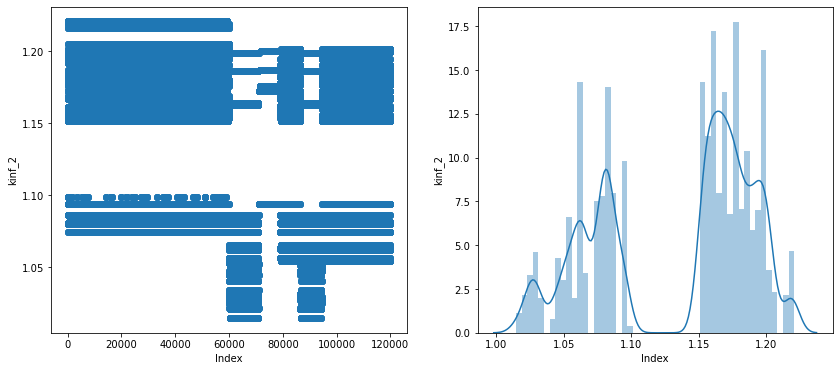

kinf_2 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


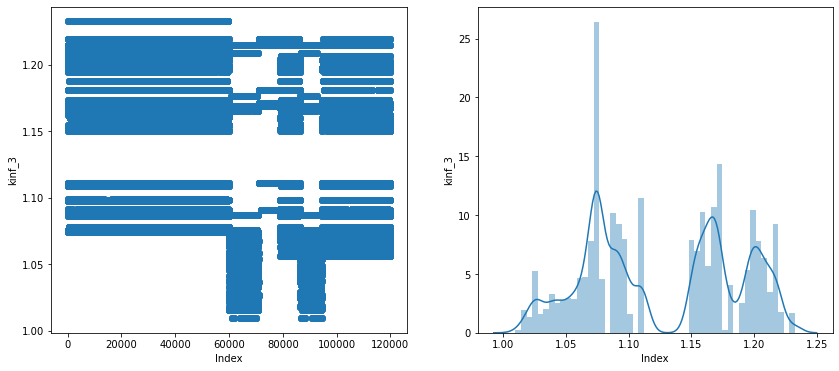

kinf_3 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


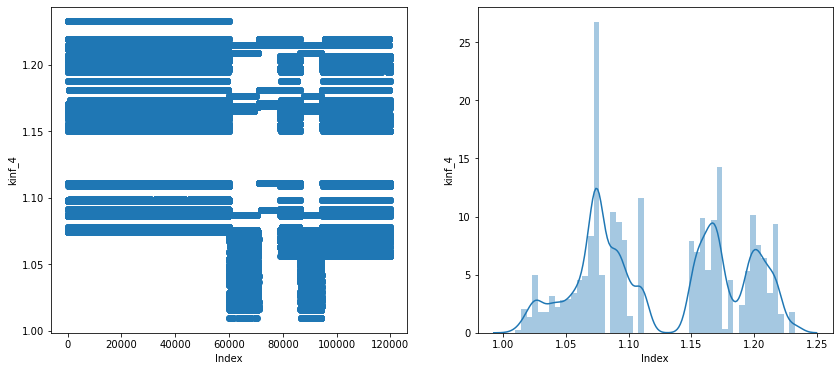

kinf_4 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


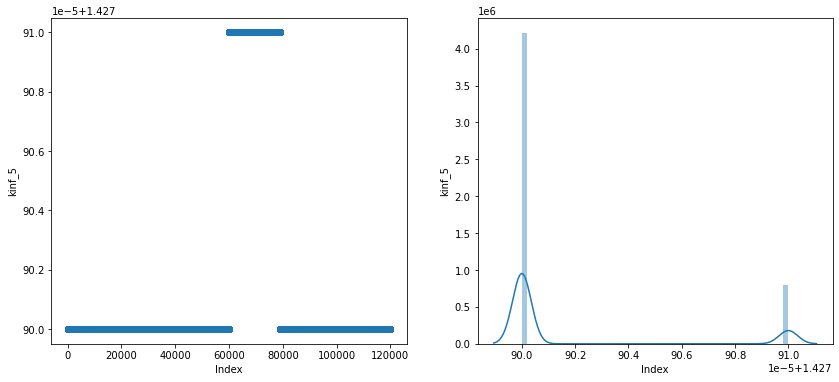

kinf_5 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


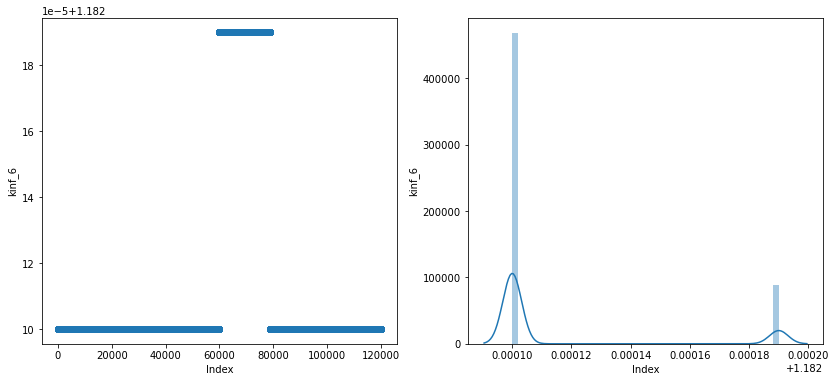

kinf_6 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


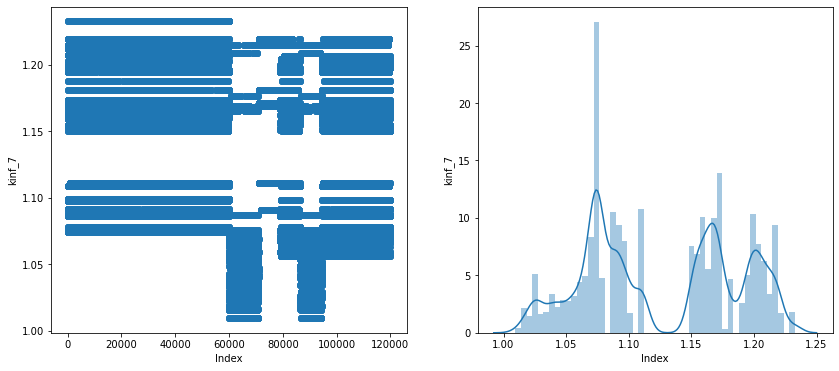

kinf_7 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


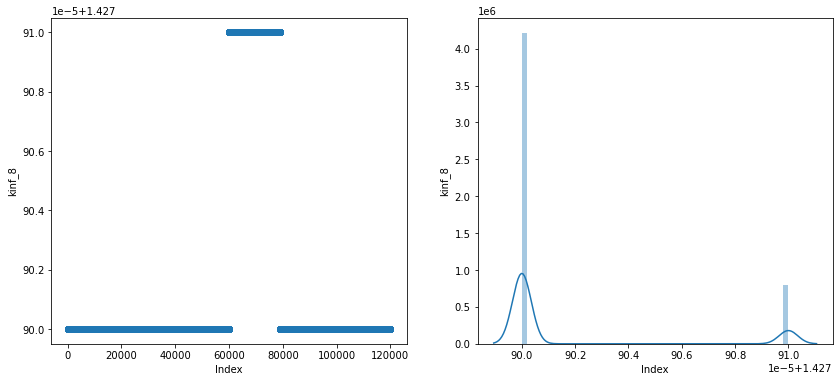

kinf_8 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


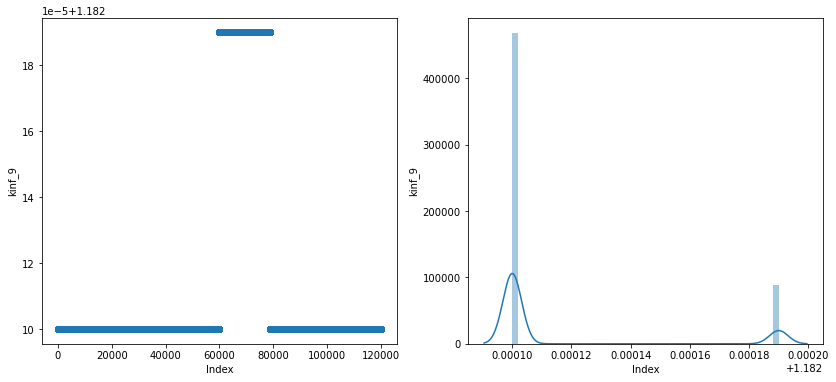

kinf_9 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


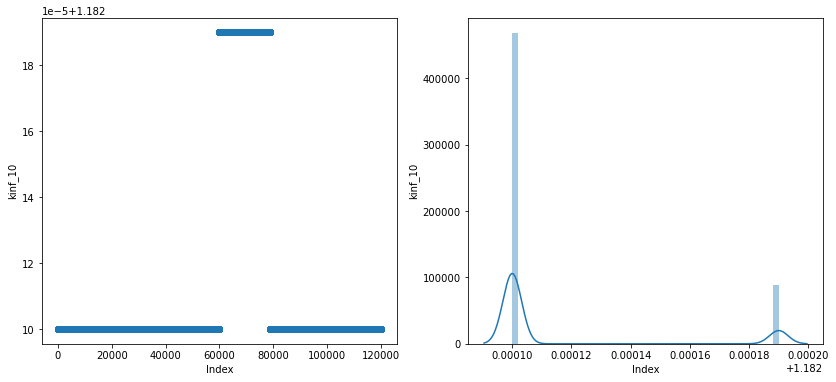

kinf_10 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


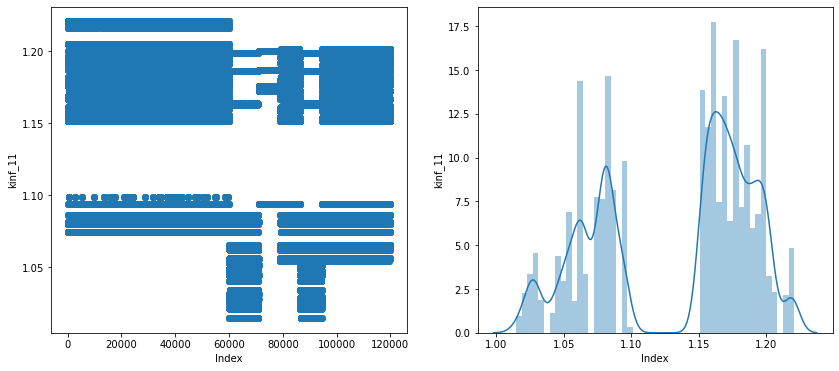

kinf_11 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


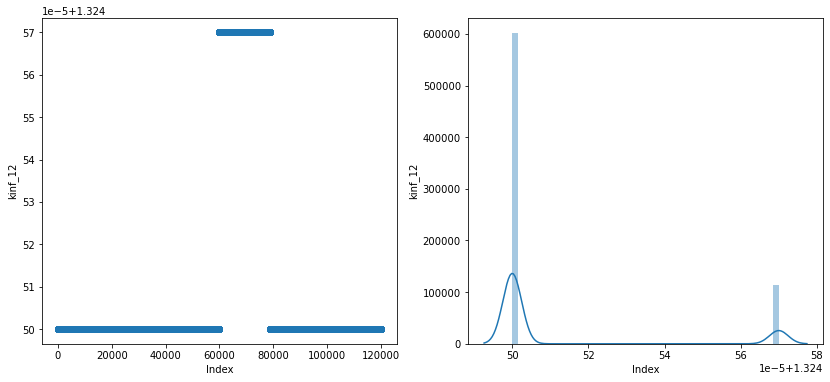

kinf_12 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


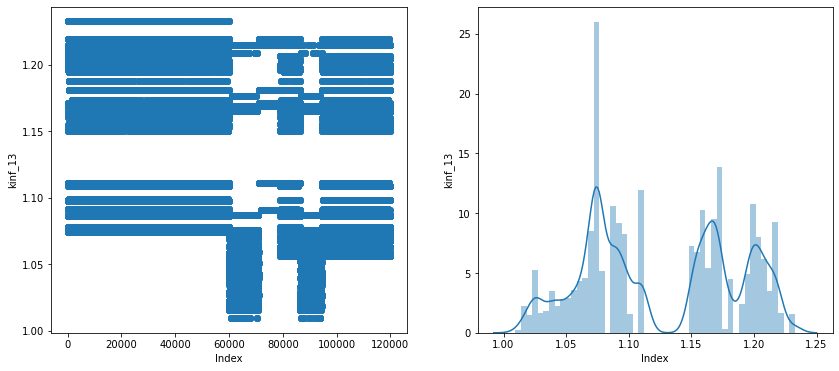

kinf_13 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


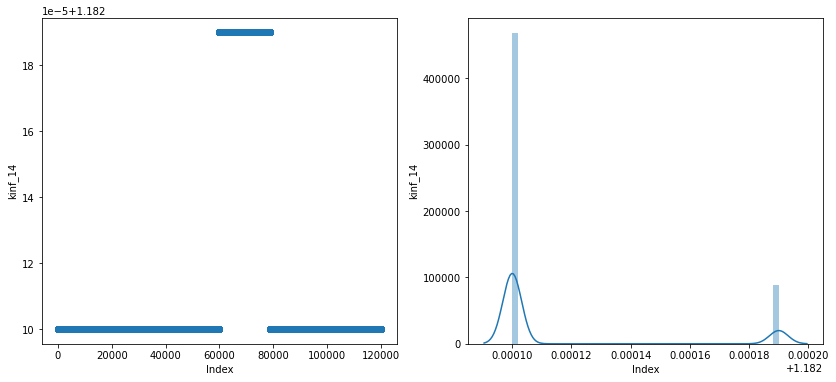

kinf_14 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


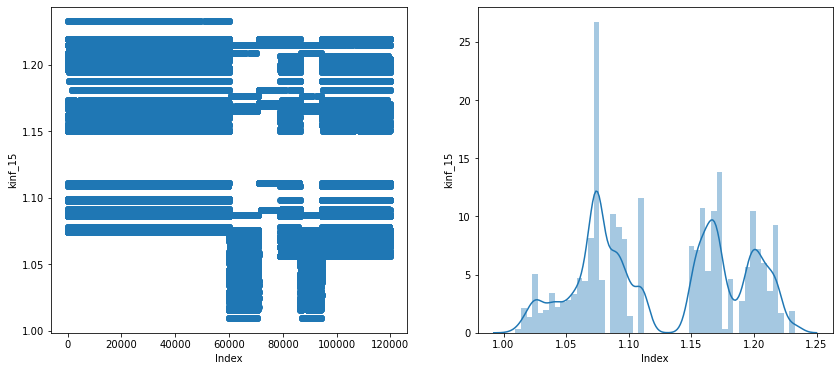

kinf_15 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


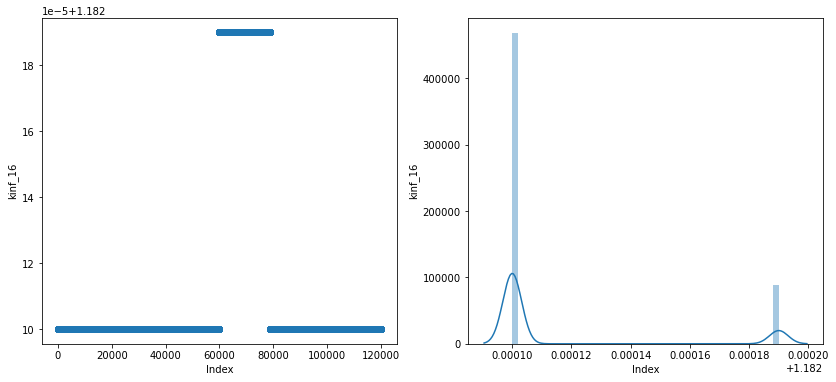

kinf_16 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


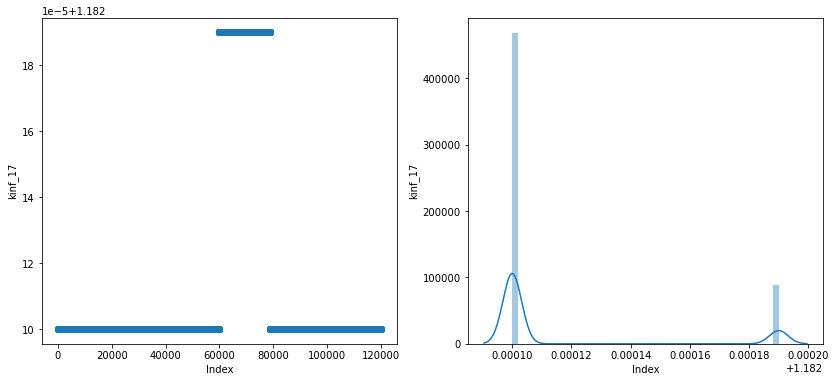

kinf_17 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


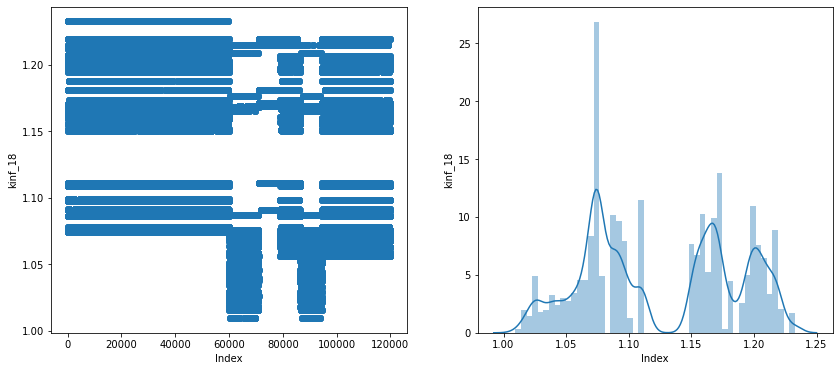

kinf_18 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


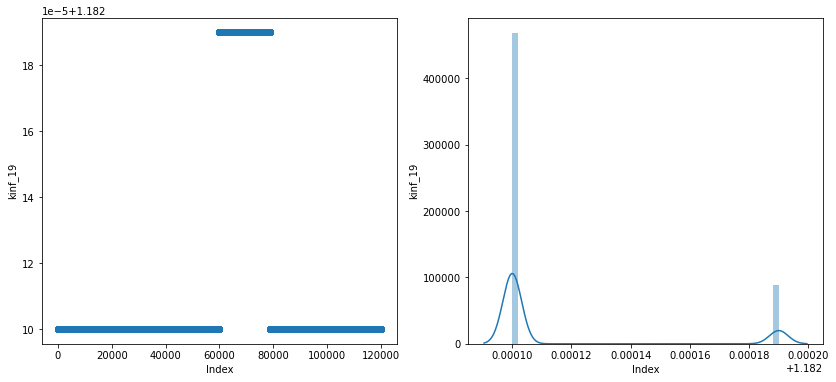

kinf_19 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


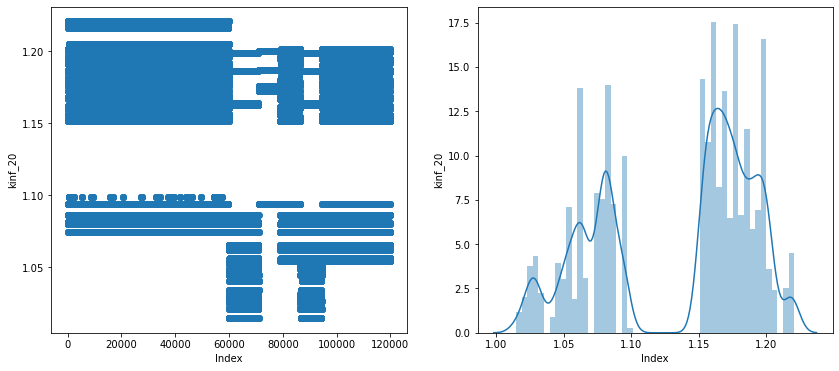

kinf_20 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


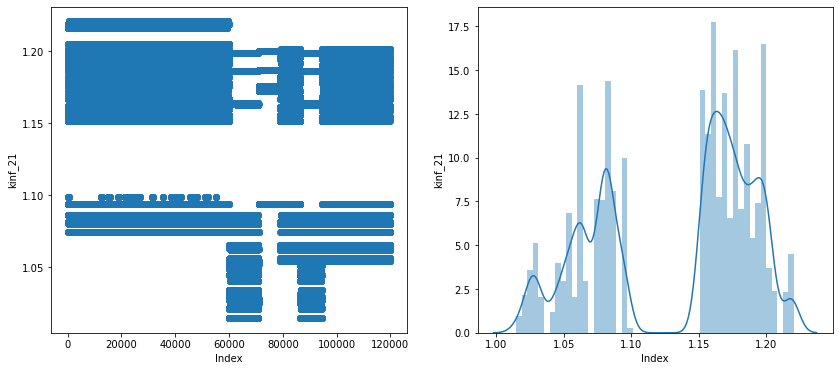

kinf_21 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


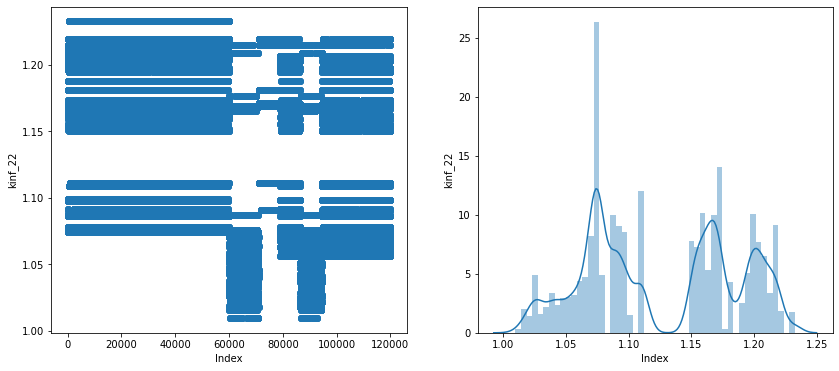

kinf_22 特征值的数量为 115


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


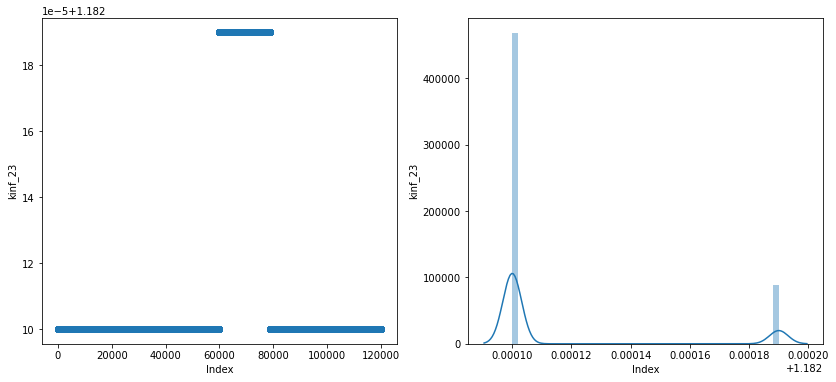

kinf_23 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kinf_24 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kinf_25 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


kinf_26 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


gd157_1 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


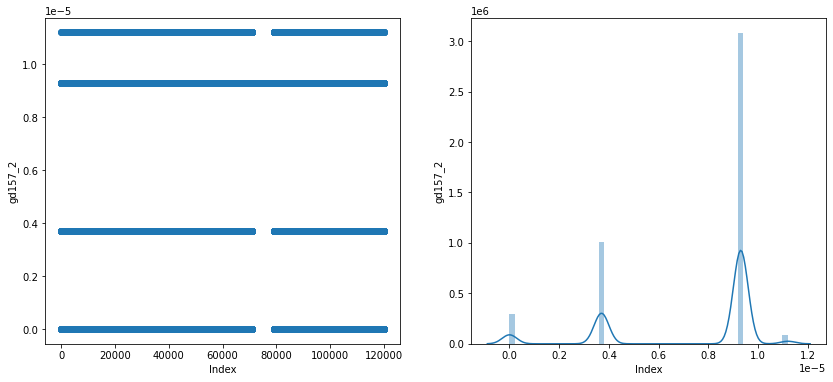

gd157_2 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


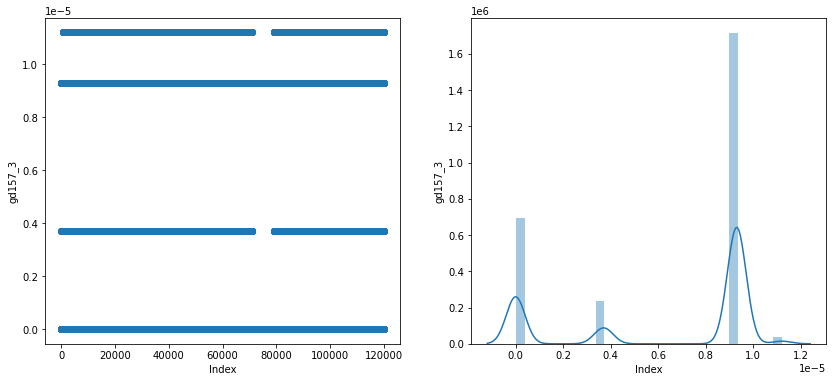

gd157_3 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


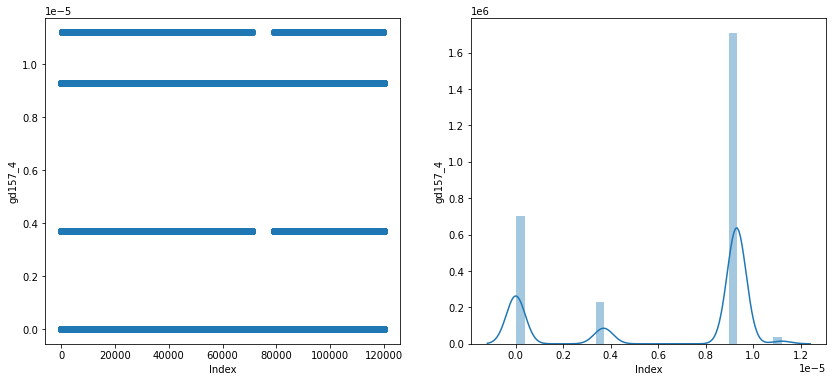

gd157_4 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


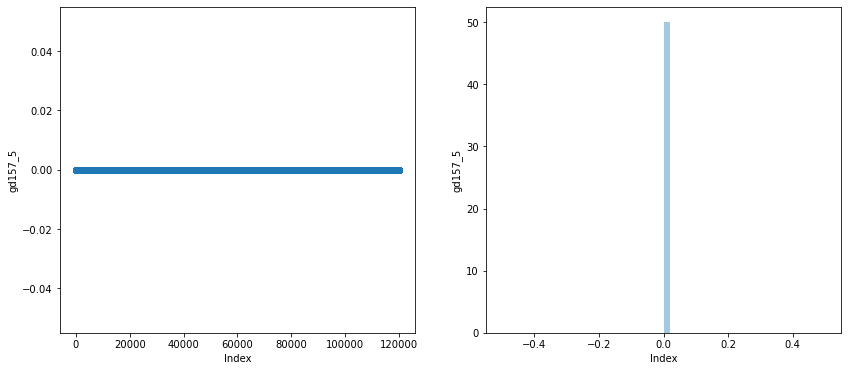

gd157_5 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


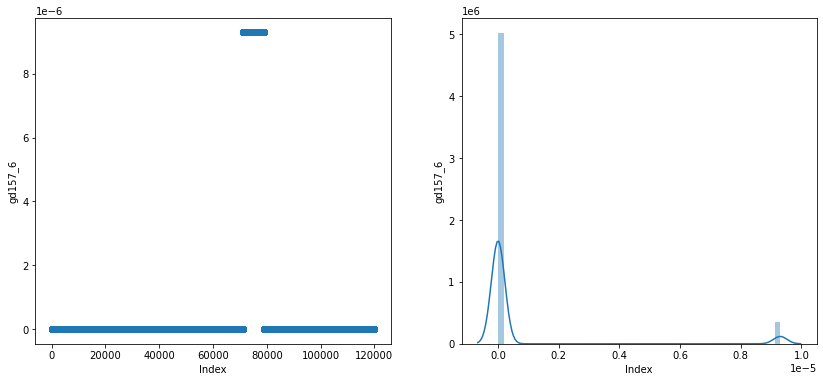

gd157_6 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


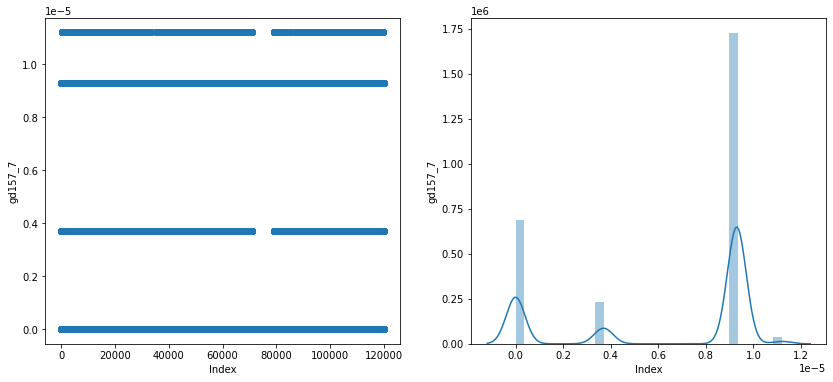

gd157_7 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


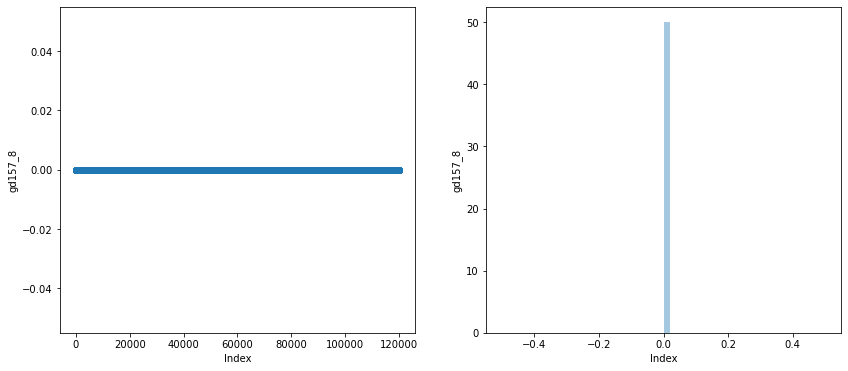

gd157_8 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


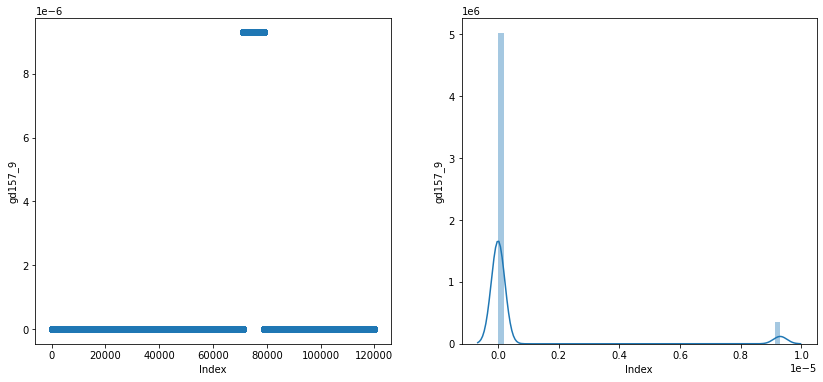

gd157_9 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


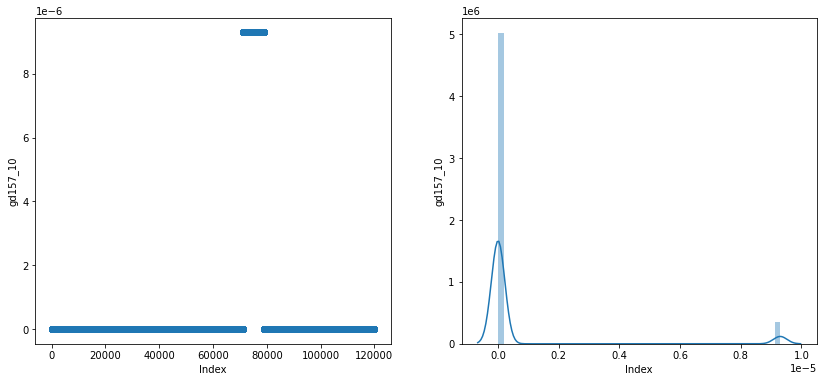

gd157_10 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


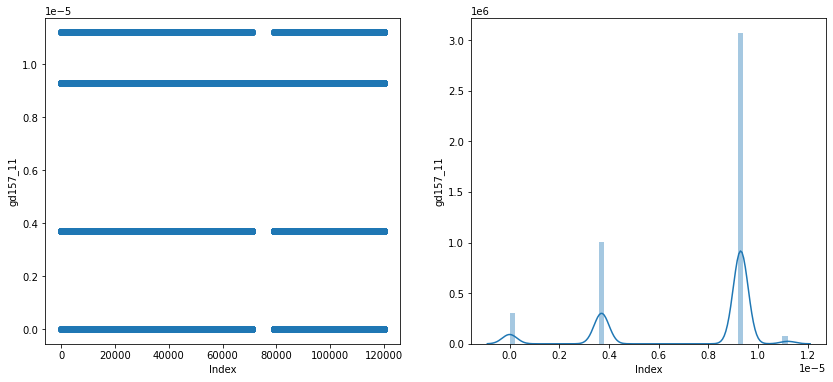

gd157_11 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


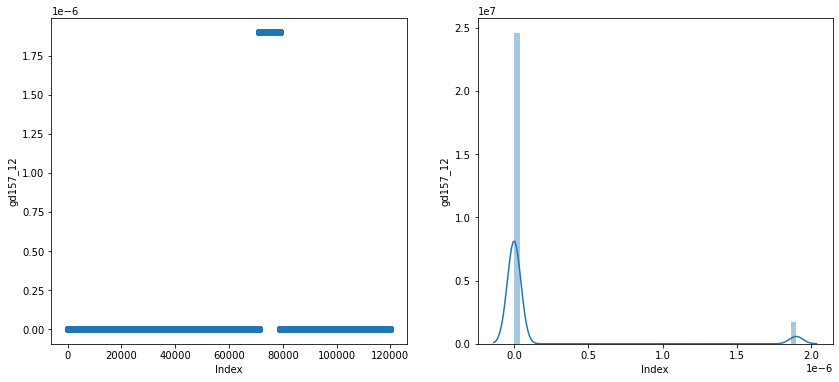

gd157_12 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


gd157_13 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


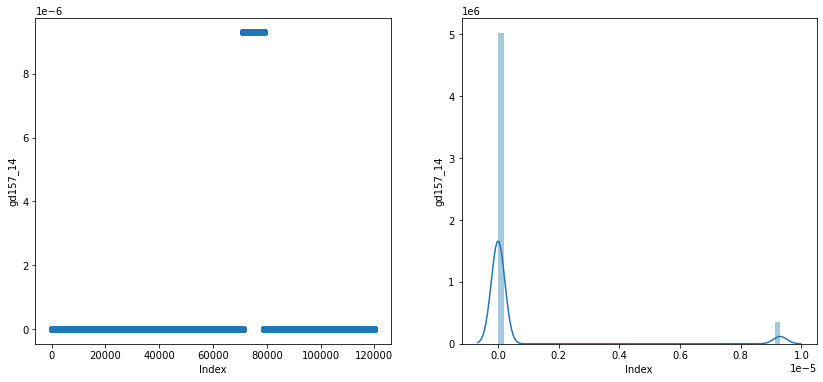

gd157_14 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


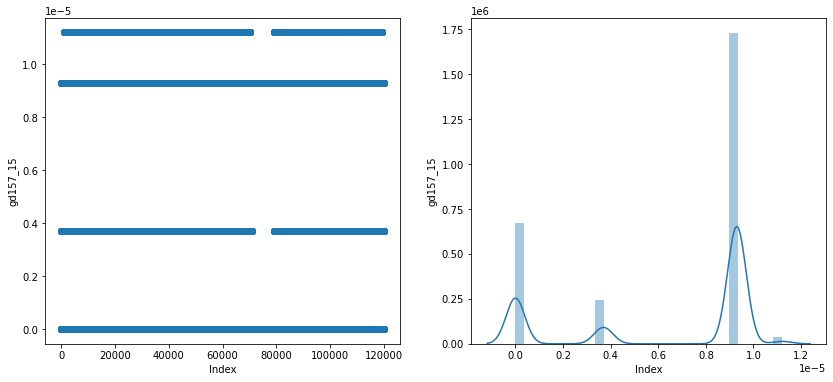

gd157_15 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


gd157_16 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


gd157_17 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


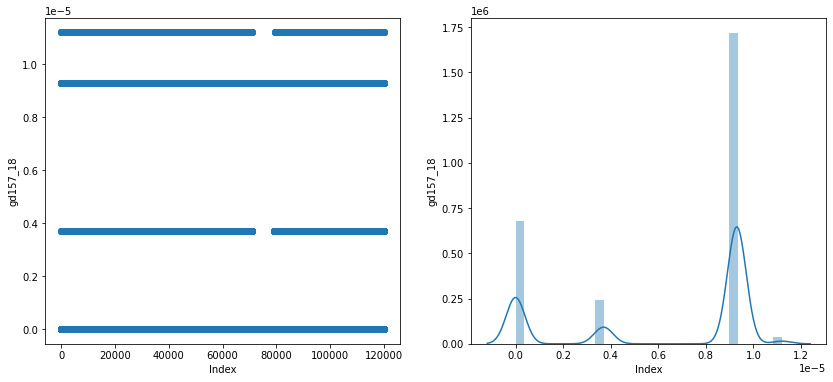

gd157_18 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


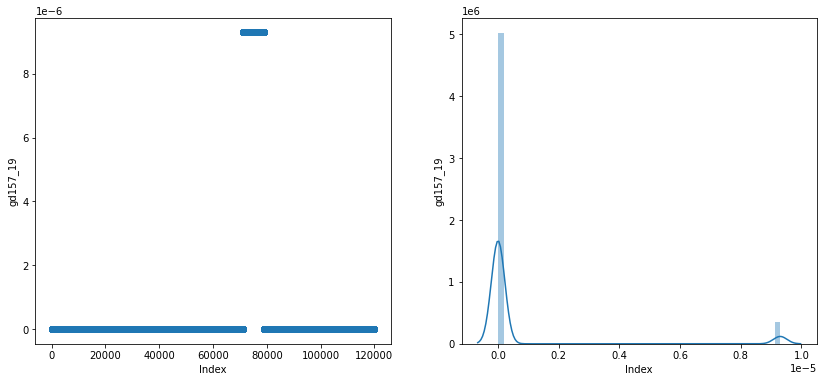

gd157_19 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


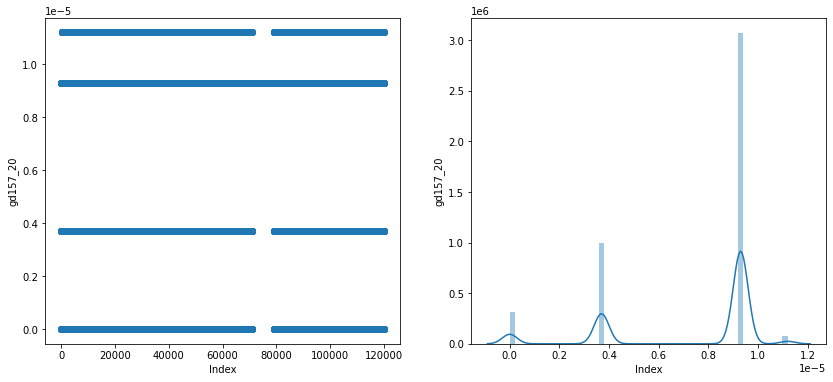

gd157_20 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


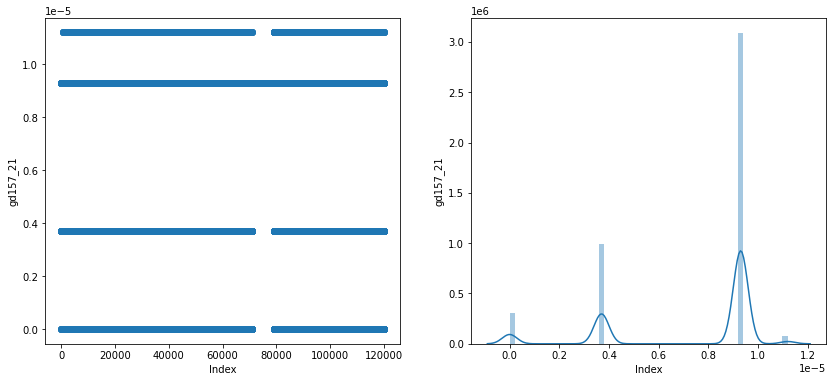

gd157_21 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


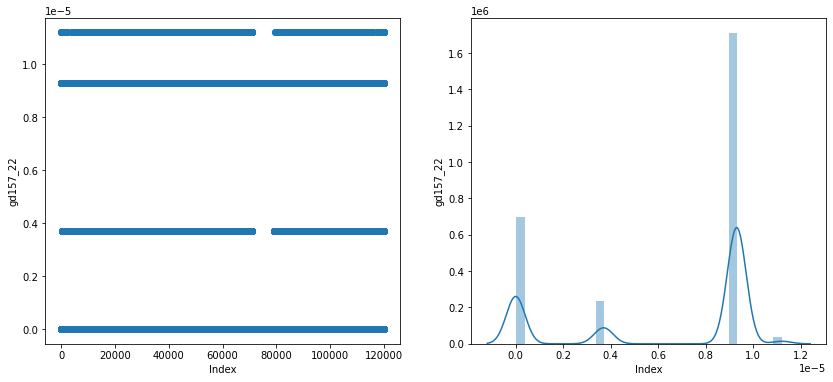

gd157_22 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


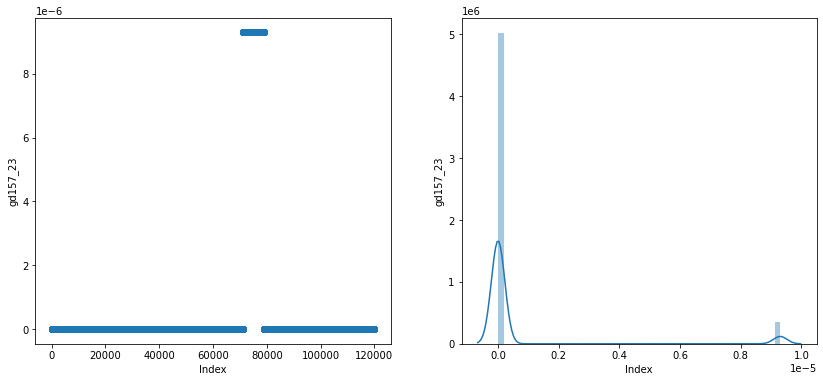

gd157_23 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


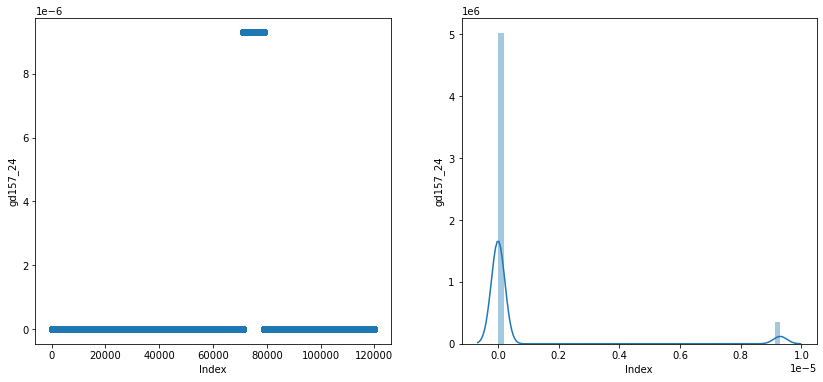

gd157_24 特征值的数量为 2


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


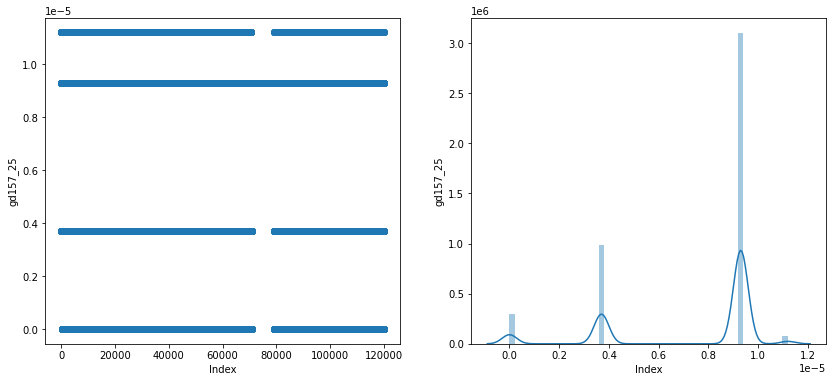

gd157_25 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


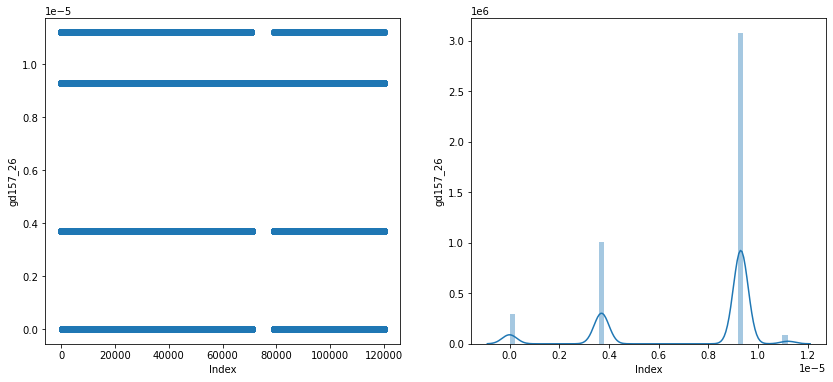

gd157_26 特征值的数量为 4


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


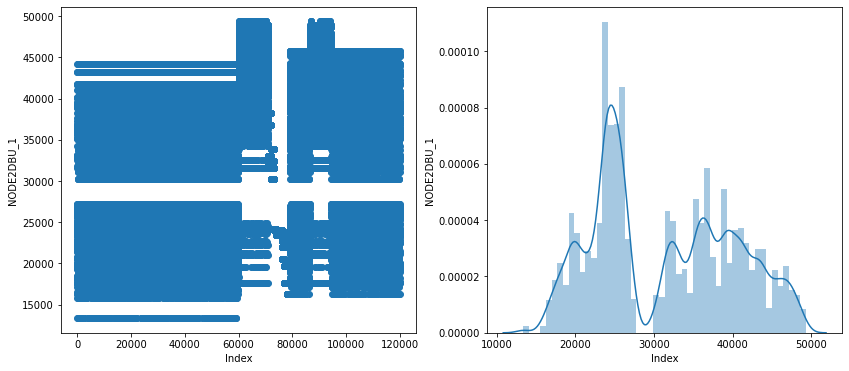

NODE2DBU_1 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


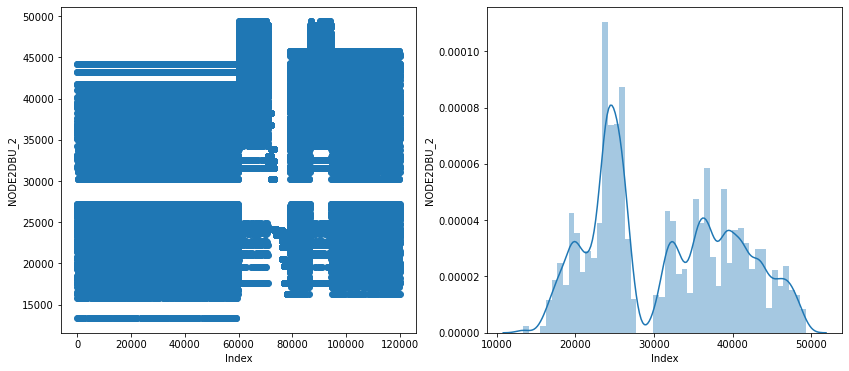

NODE2DBU_2 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


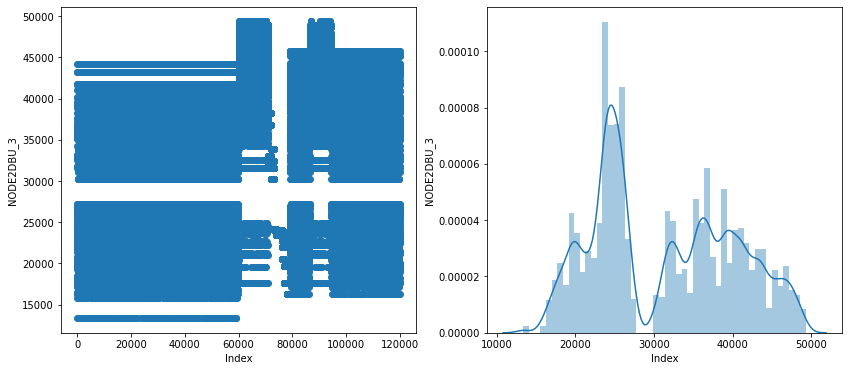

NODE2DBU_3 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


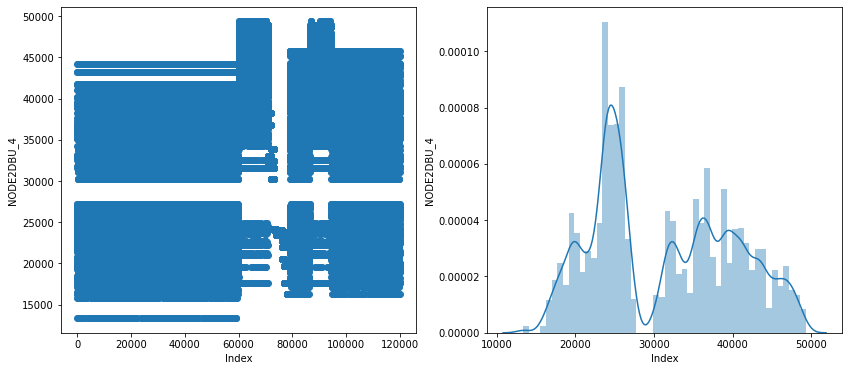

NODE2DBU_4 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_5 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_6 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


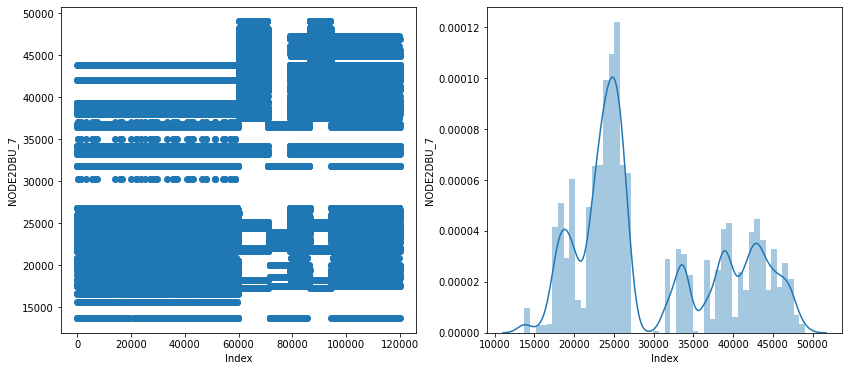

NODE2DBU_7 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_8 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


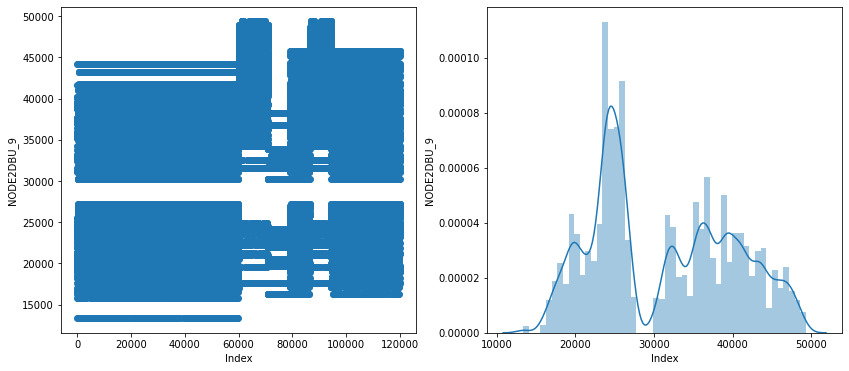

NODE2DBU_9 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


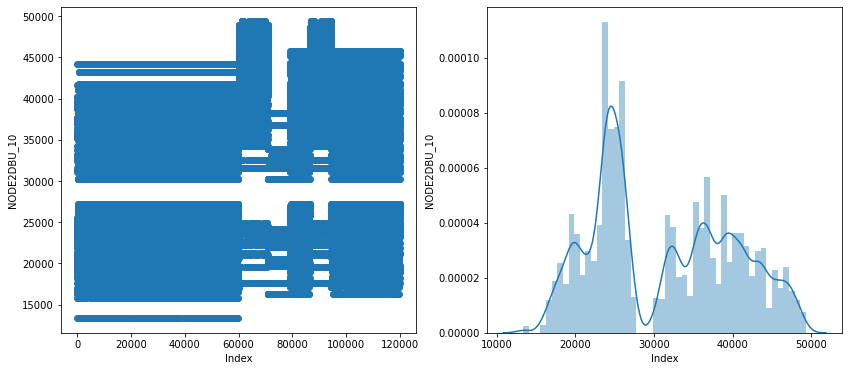

NODE2DBU_10 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


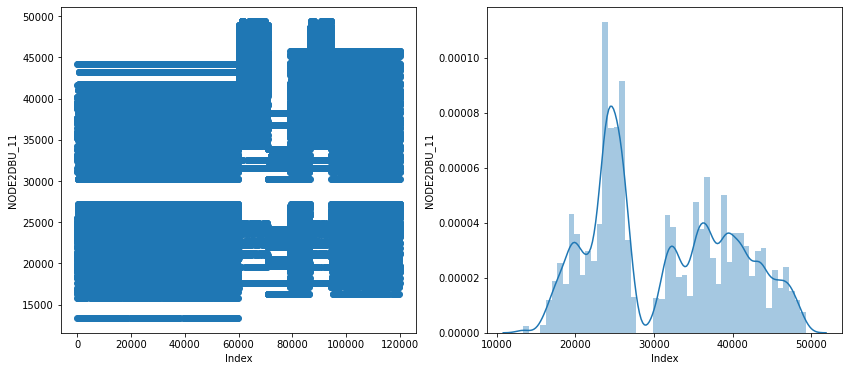

NODE2DBU_11 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


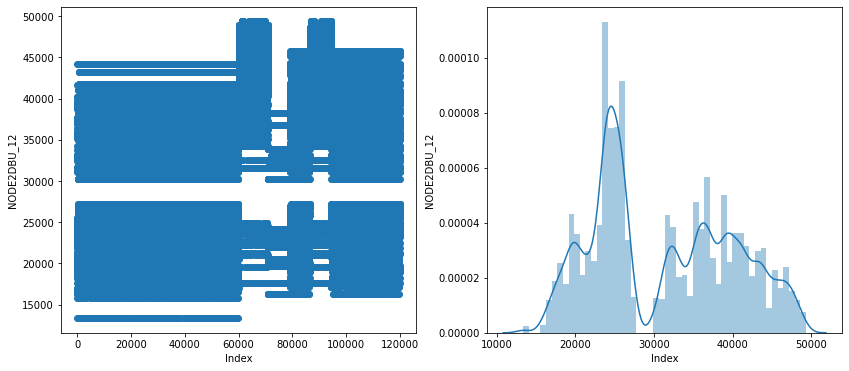

NODE2DBU_12 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


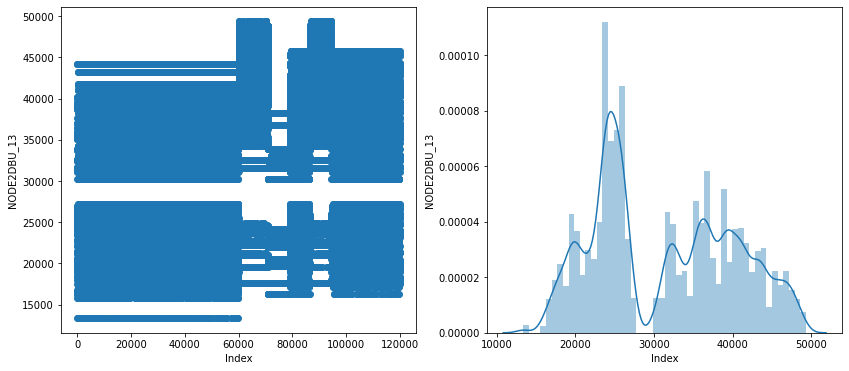

NODE2DBU_13 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


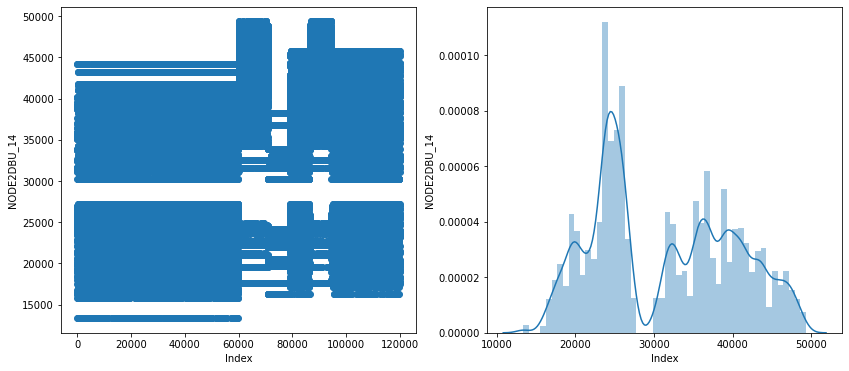

NODE2DBU_14 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


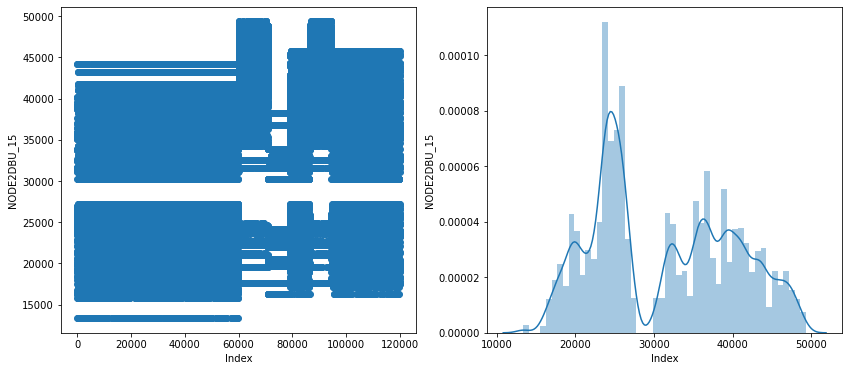

NODE2DBU_15 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


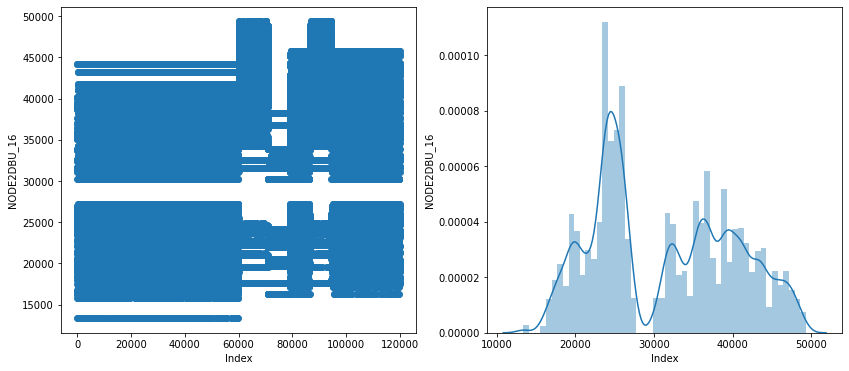

NODE2DBU_16 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


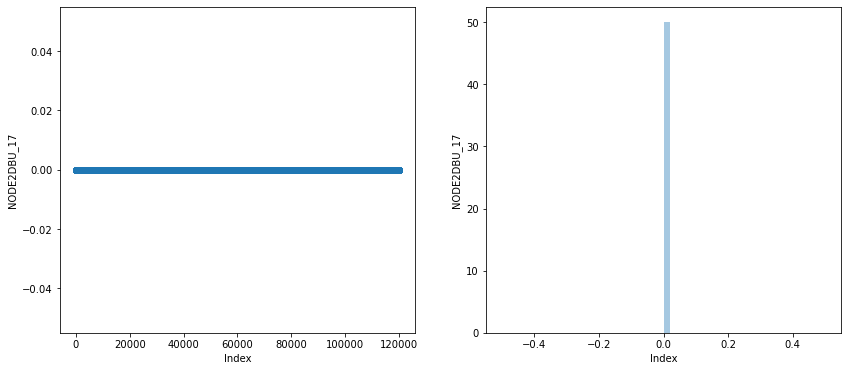

NODE2DBU_17 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


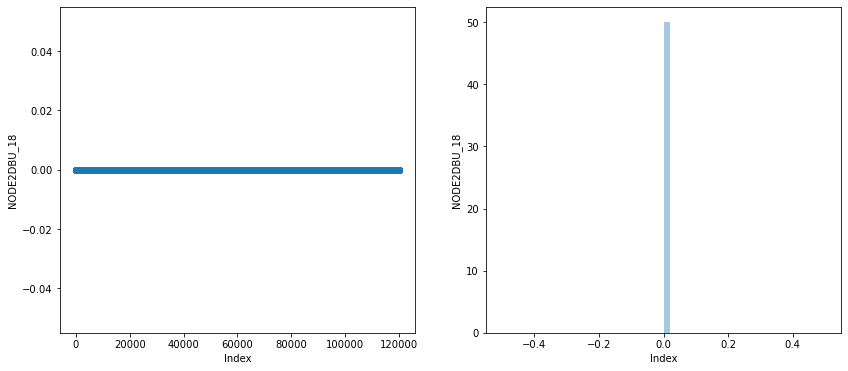

NODE2DBU_18 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


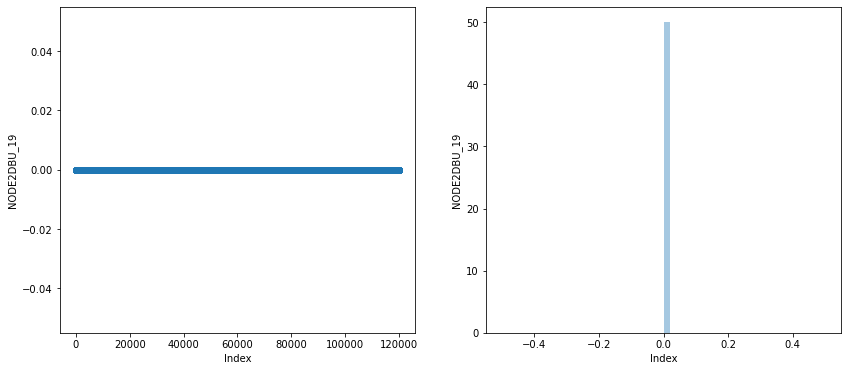

NODE2DBU_19 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


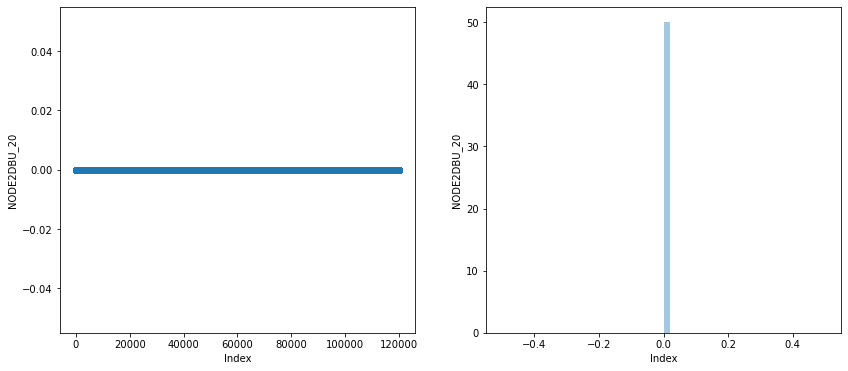

NODE2DBU_20 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


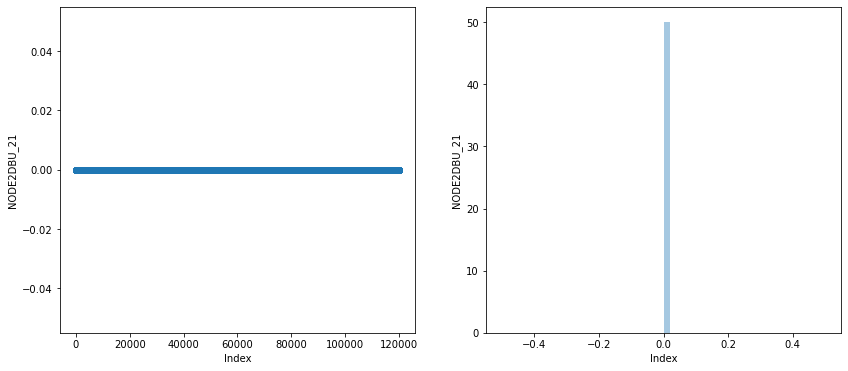

NODE2DBU_21 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


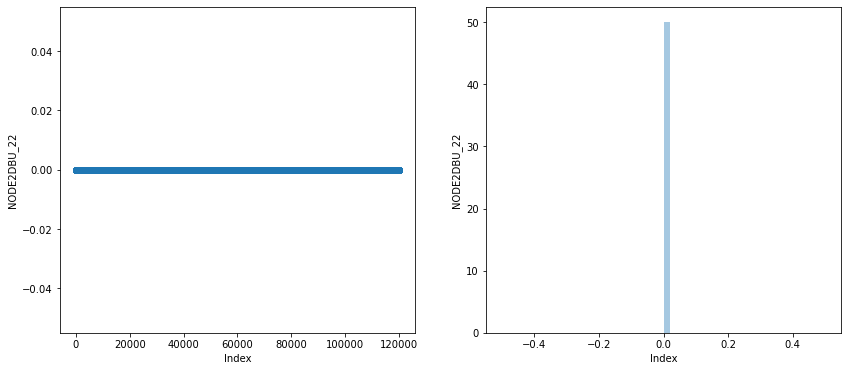

NODE2DBU_22 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


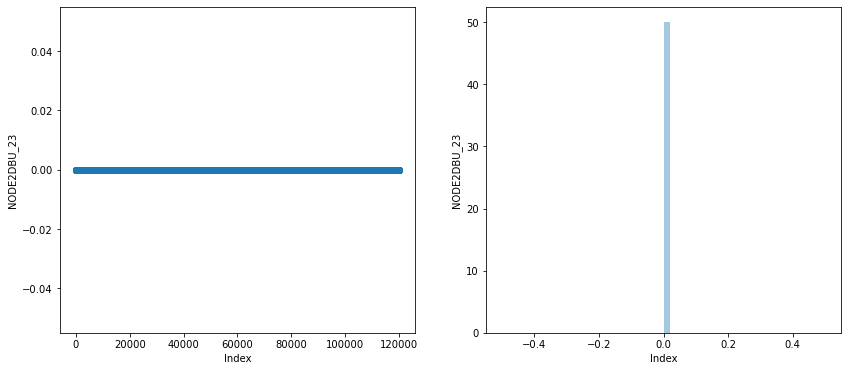

NODE2DBU_23 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


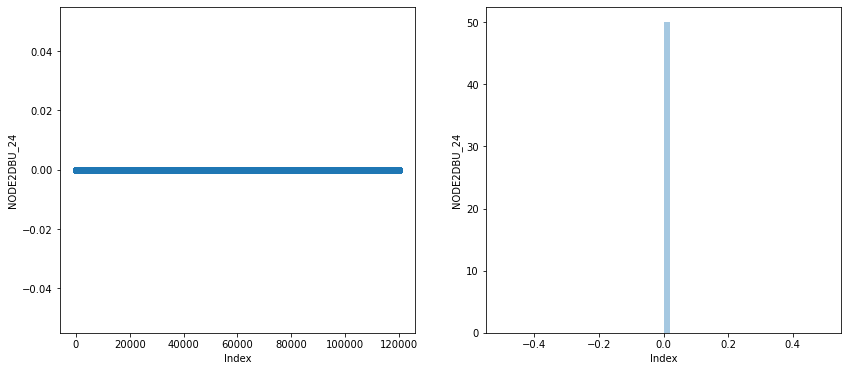

NODE2DBU_24 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


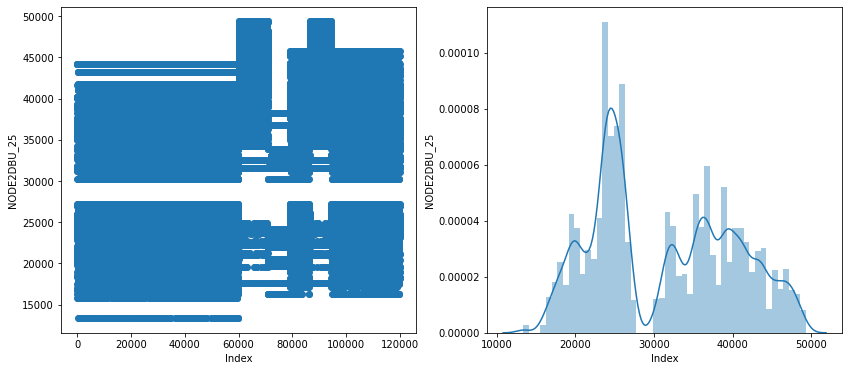

NODE2DBU_25 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


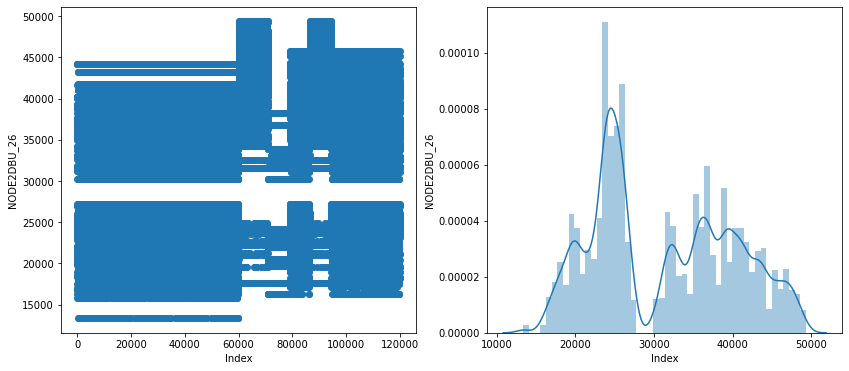

NODE2DBU_26 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_27 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_28 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


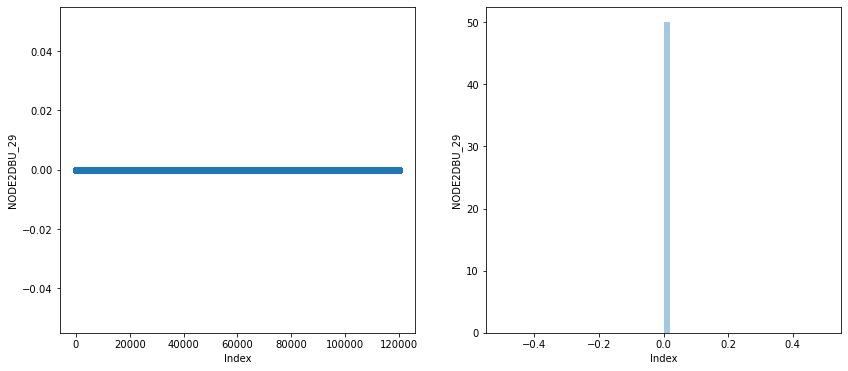

NODE2DBU_29 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


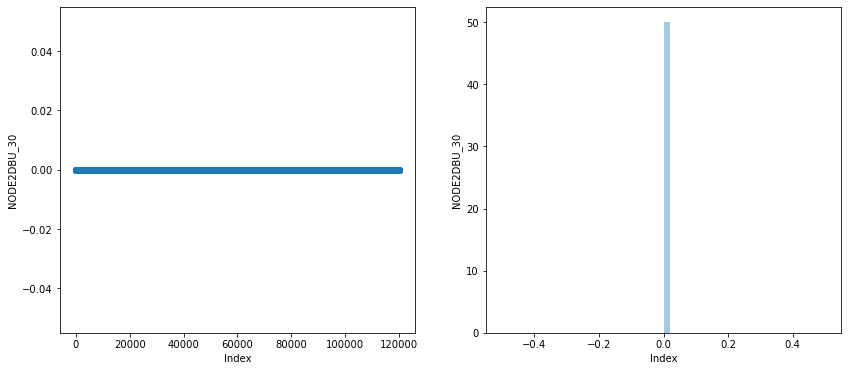

NODE2DBU_30 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


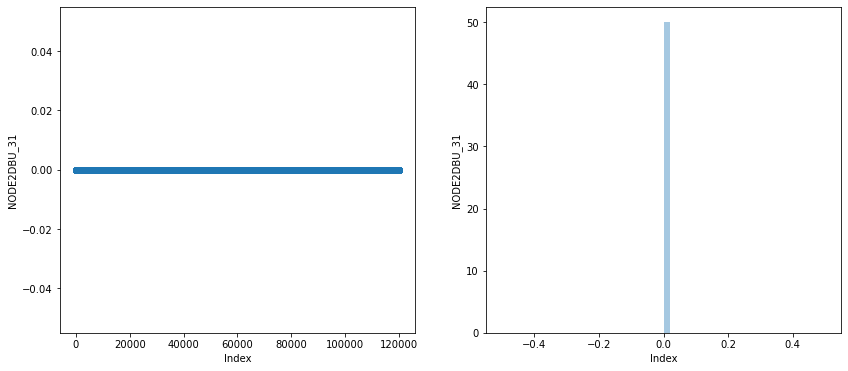

NODE2DBU_31 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


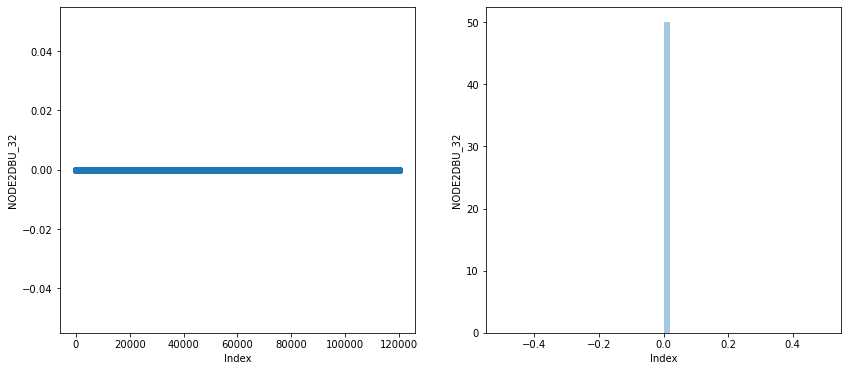

NODE2DBU_32 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


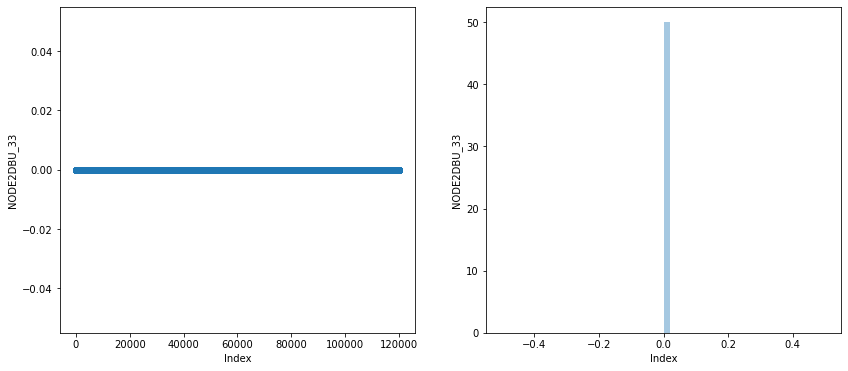

NODE2DBU_33 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


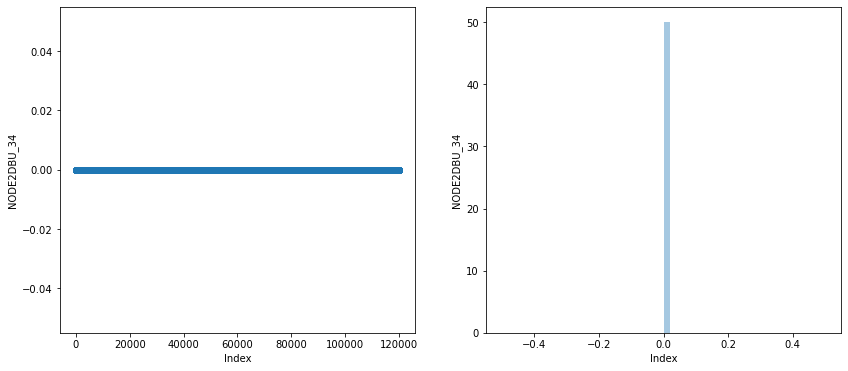

NODE2DBU_34 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


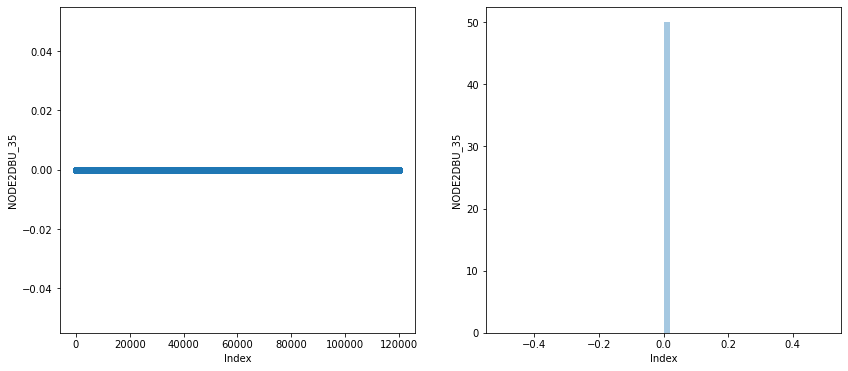

NODE2DBU_35 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


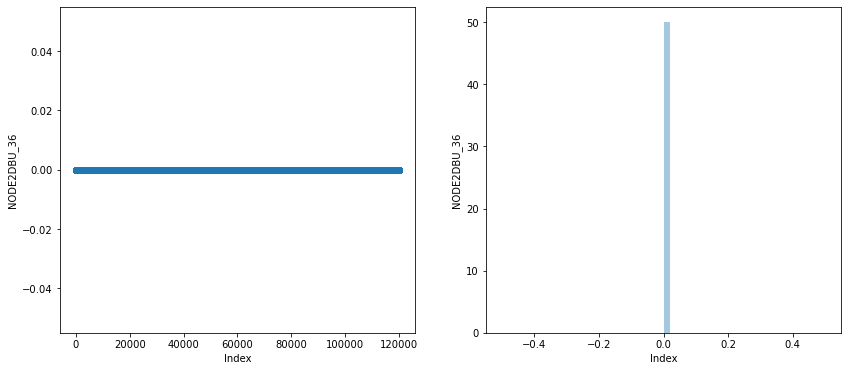

NODE2DBU_36 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


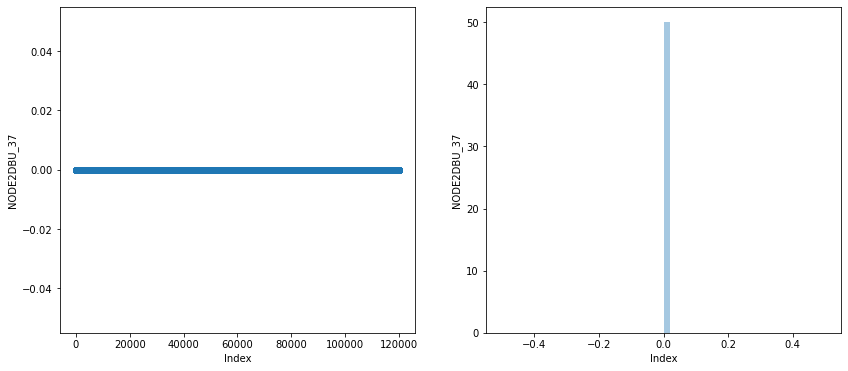

NODE2DBU_37 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


NODE2DBU_38 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


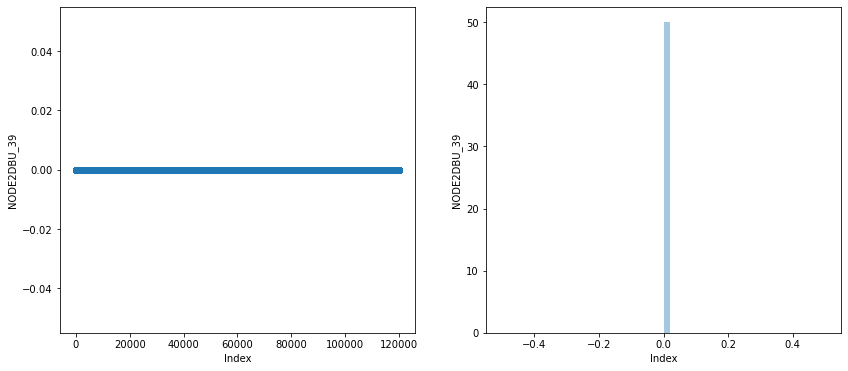

NODE2DBU_39 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


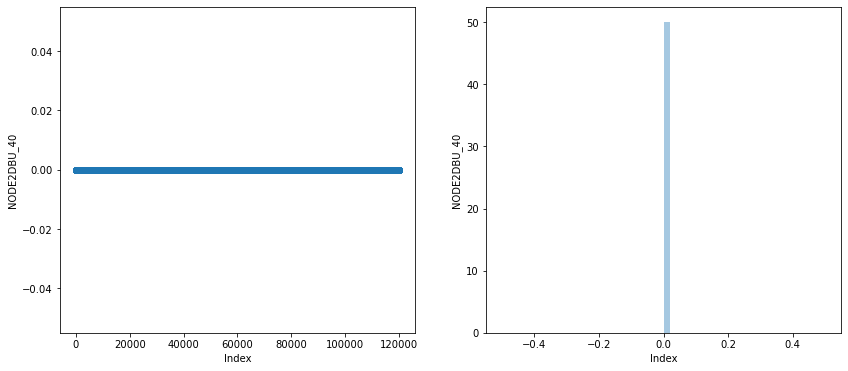

NODE2DBU_40 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


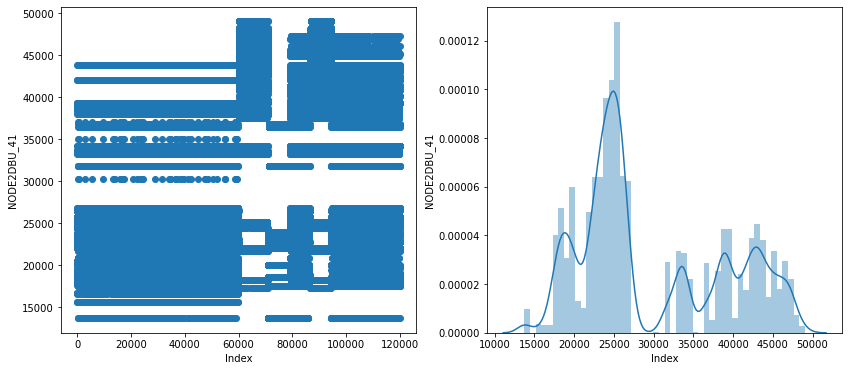

NODE2DBU_41 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


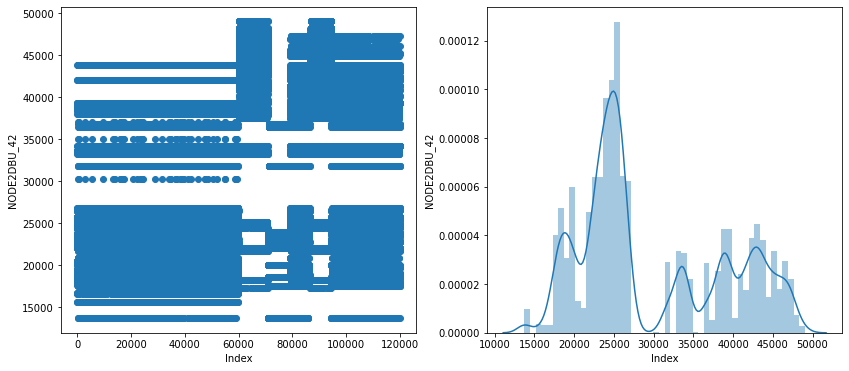

NODE2DBU_42 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


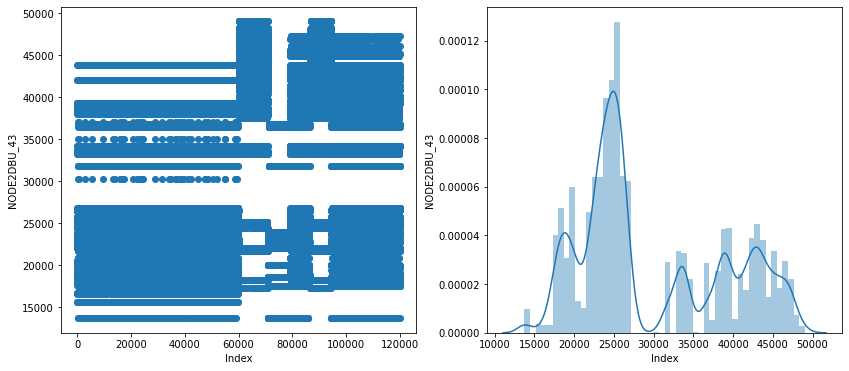

NODE2DBU_43 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


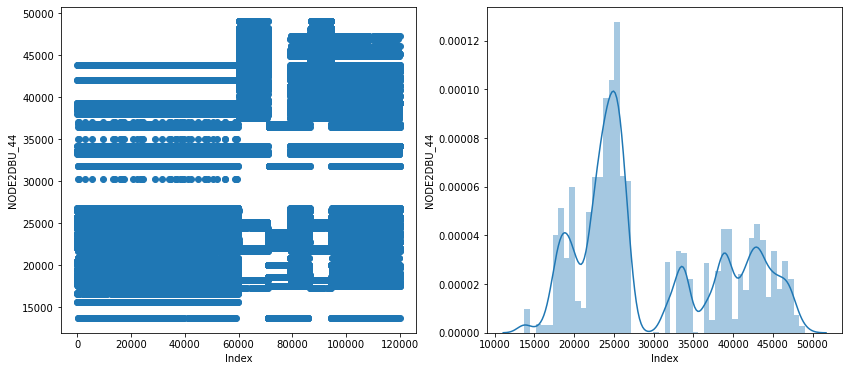

NODE2DBU_44 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


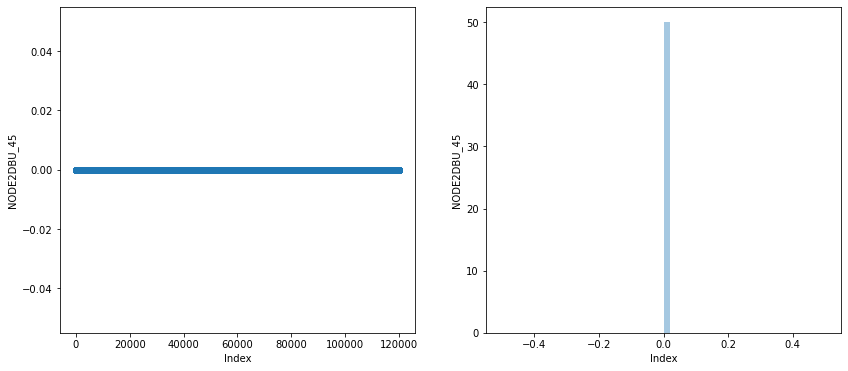

NODE2DBU_45 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


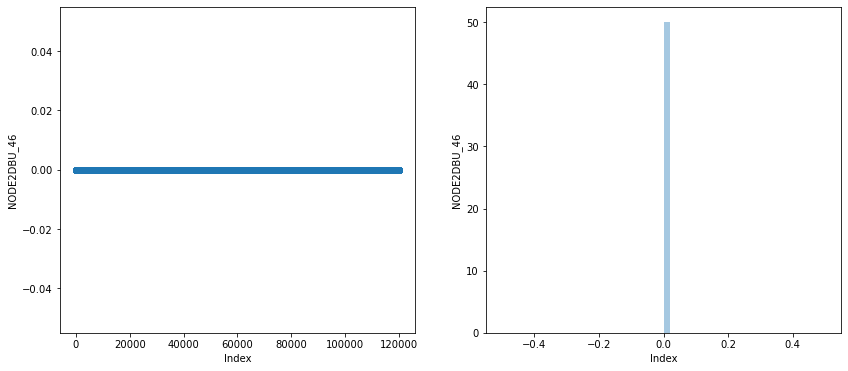

NODE2DBU_46 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


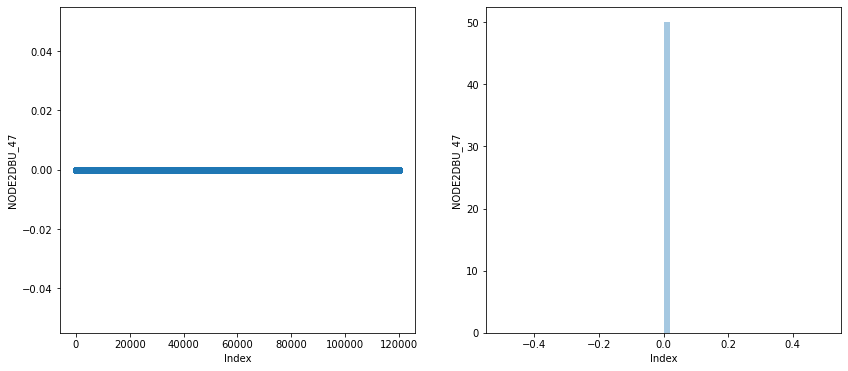

NODE2DBU_47 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


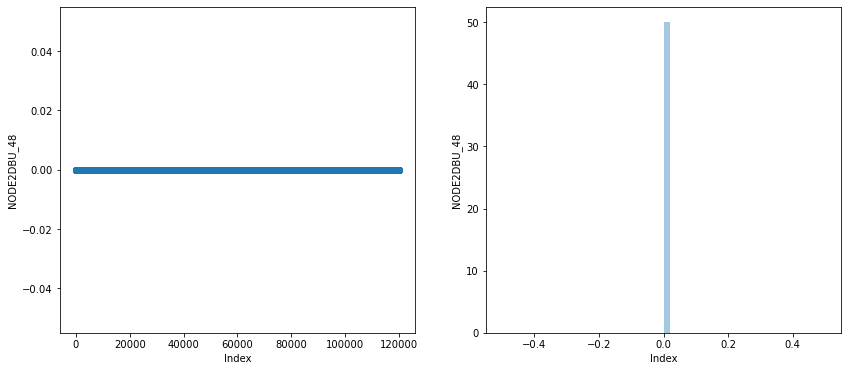

NODE2DBU_48 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


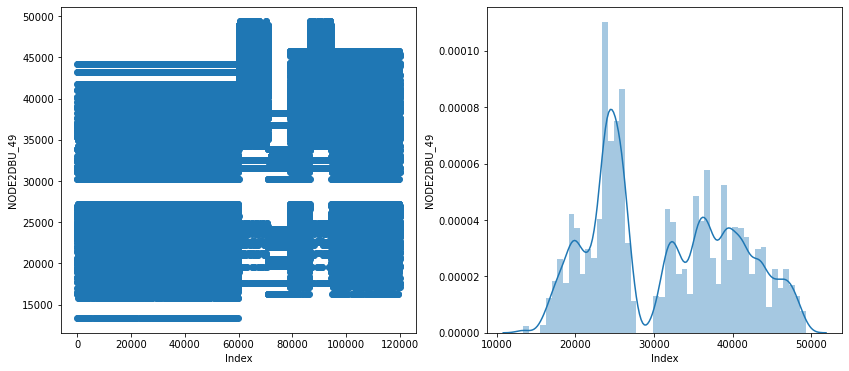

NODE2DBU_49 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


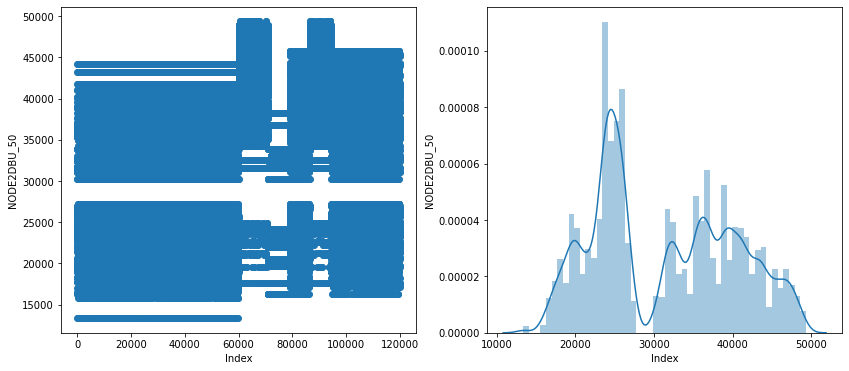

NODE2DBU_50 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


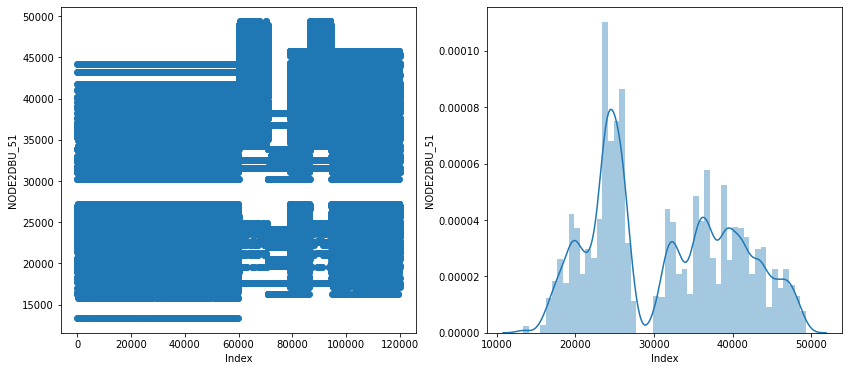

NODE2DBU_51 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


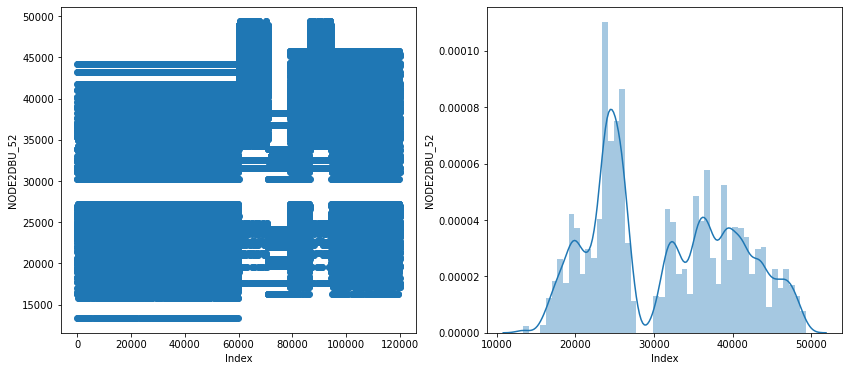

NODE2DBU_52 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


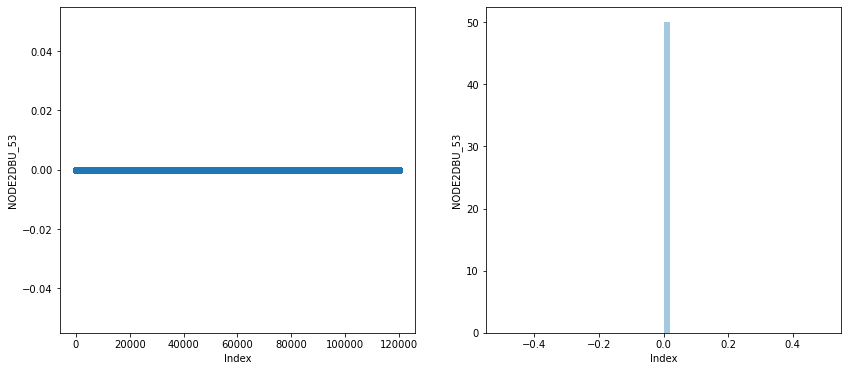

NODE2DBU_53 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


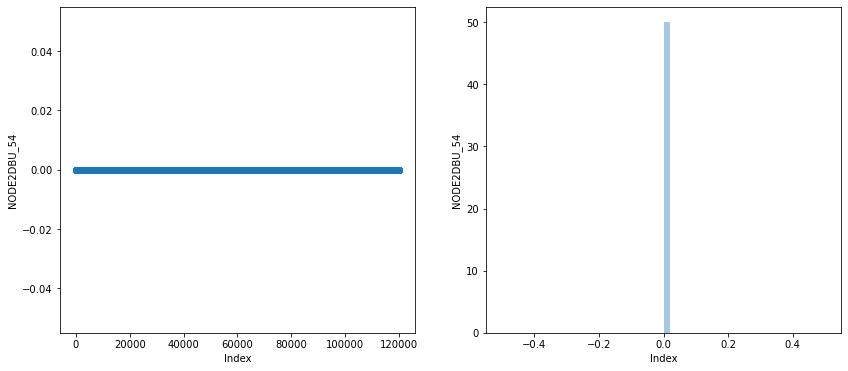

NODE2DBU_54 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


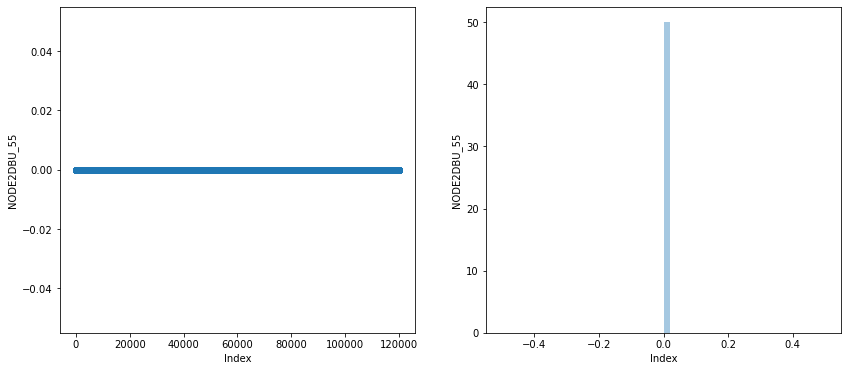

NODE2DBU_55 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


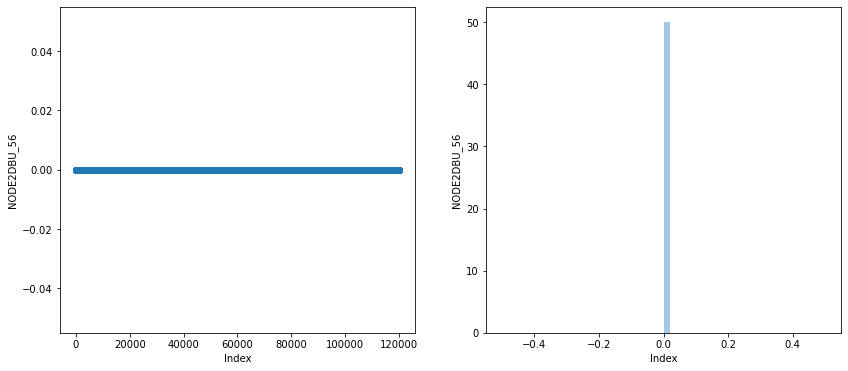

NODE2DBU_56 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


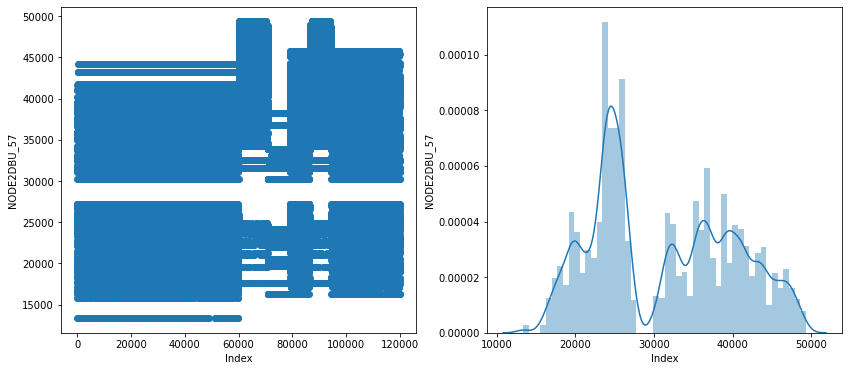

NODE2DBU_57 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


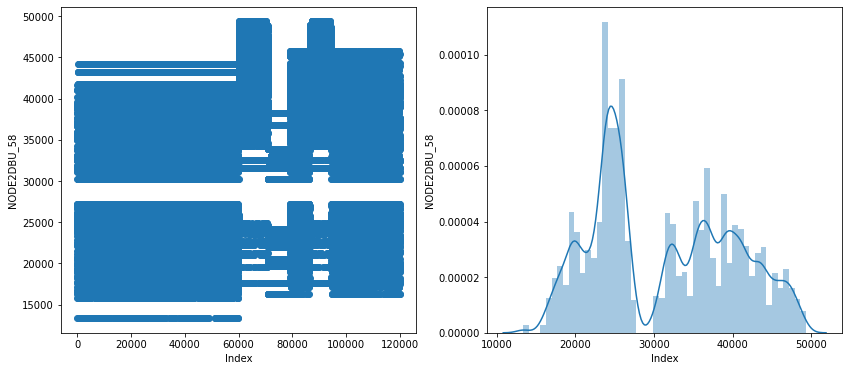

NODE2DBU_58 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


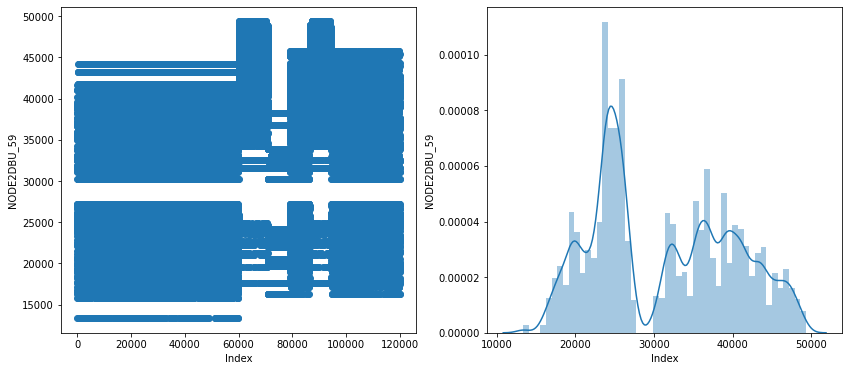

NODE2DBU_59 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


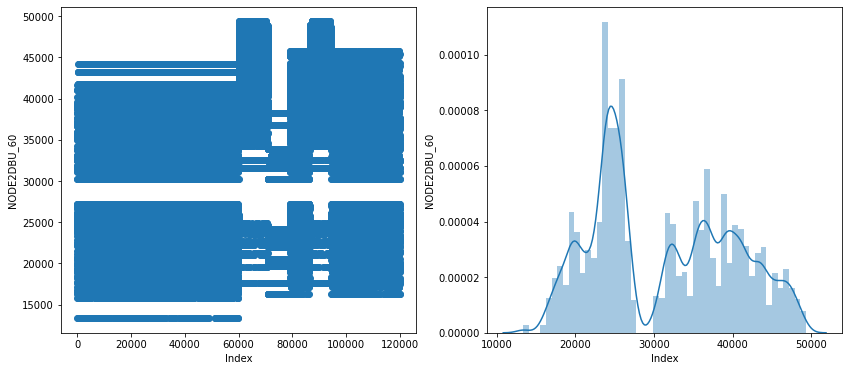

NODE2DBU_60 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


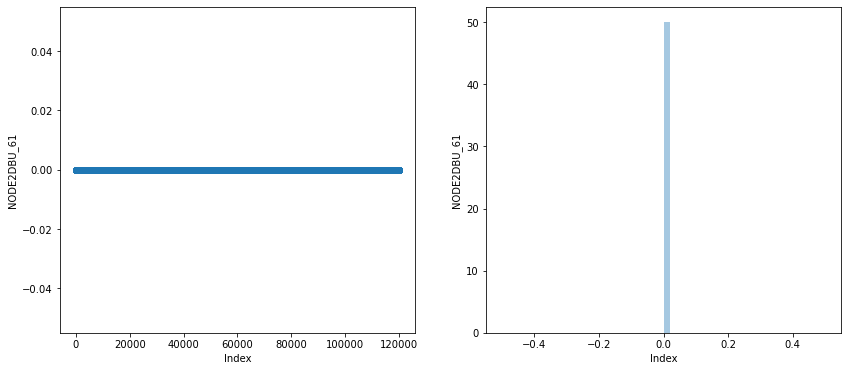

NODE2DBU_61 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


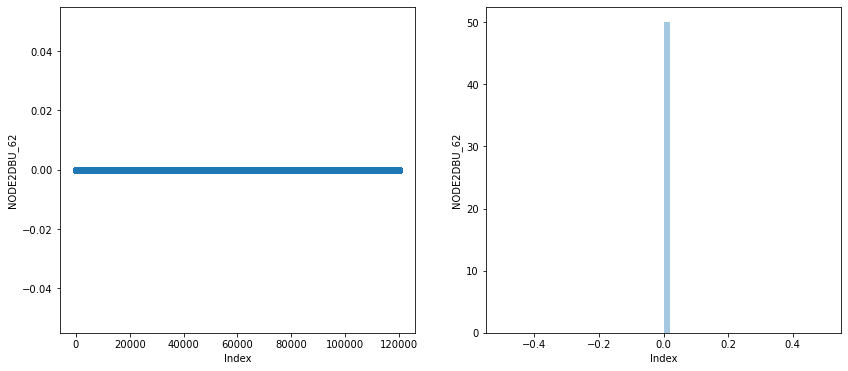

NODE2DBU_62 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


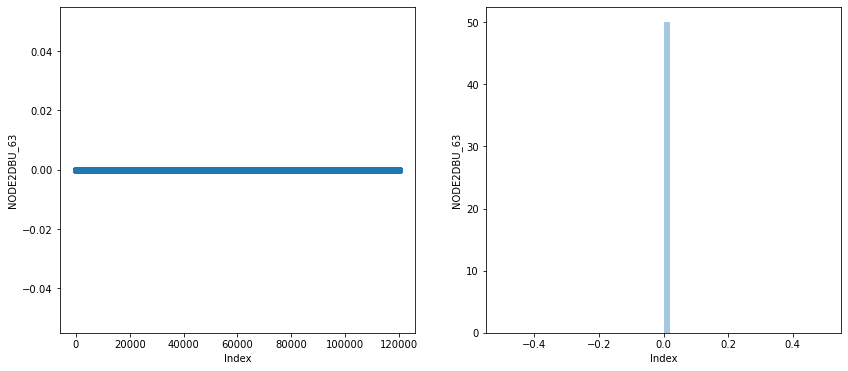

NODE2DBU_63 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


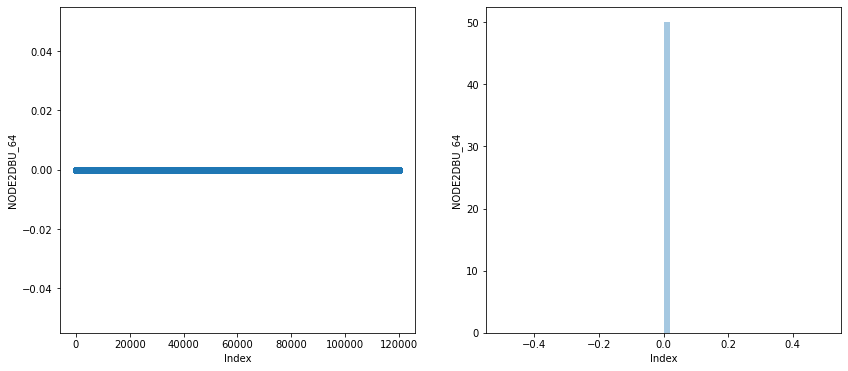

NODE2DBU_64 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


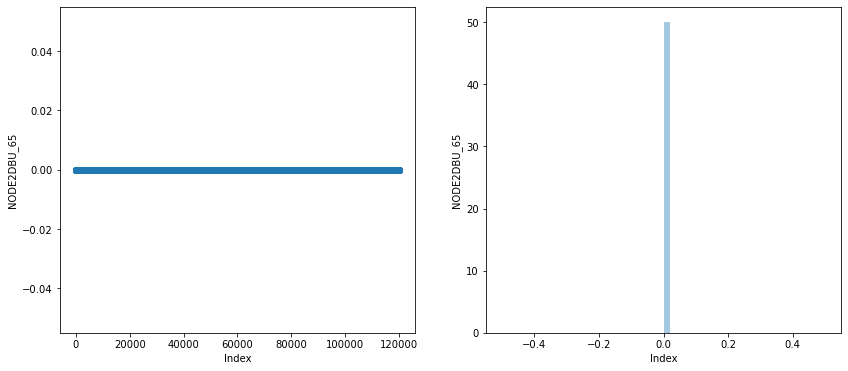

NODE2DBU_65 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


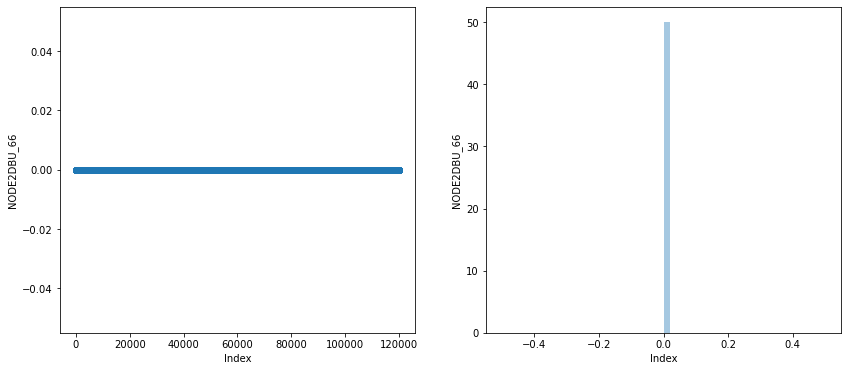

NODE2DBU_66 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


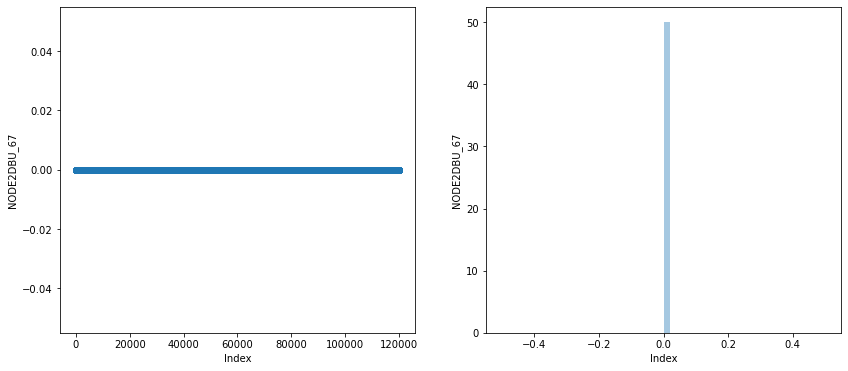

NODE2DBU_67 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


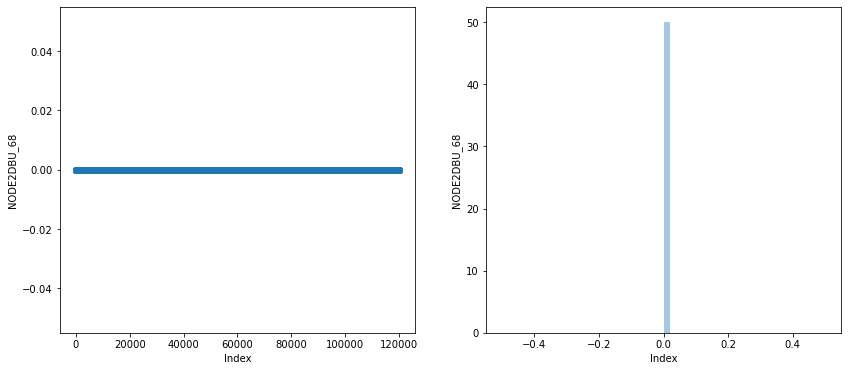

NODE2DBU_68 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


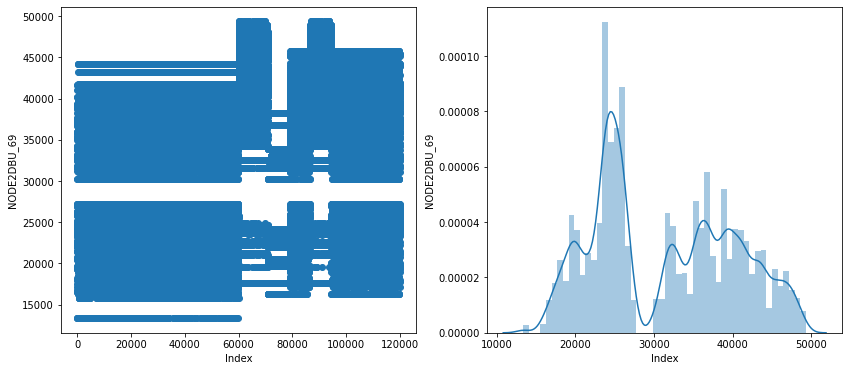

NODE2DBU_69 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


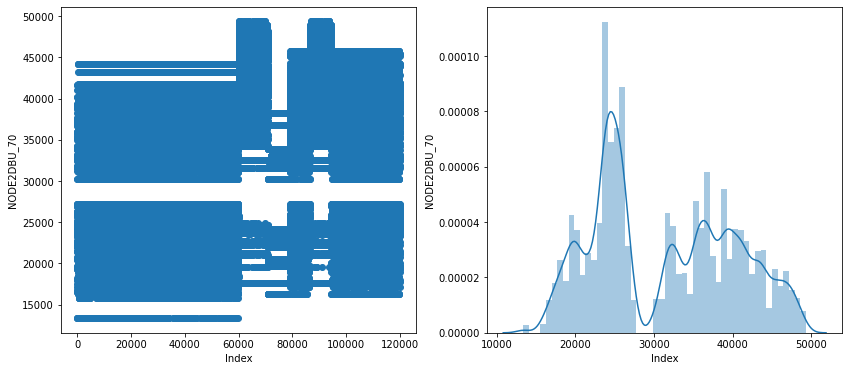

NODE2DBU_70 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_71 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


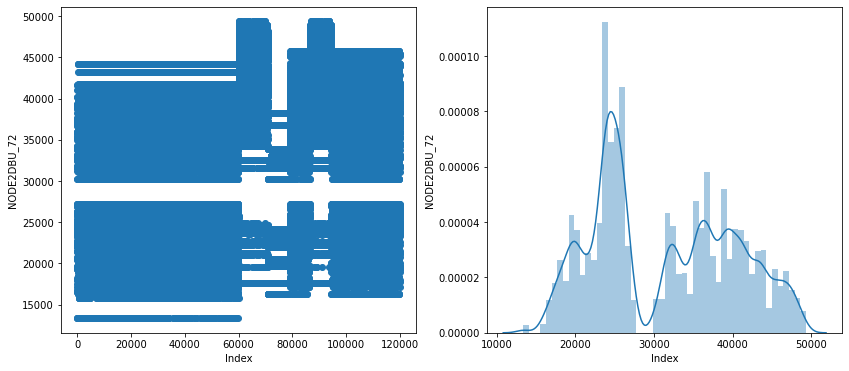

NODE2DBU_72 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


NODE2DBU_73 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


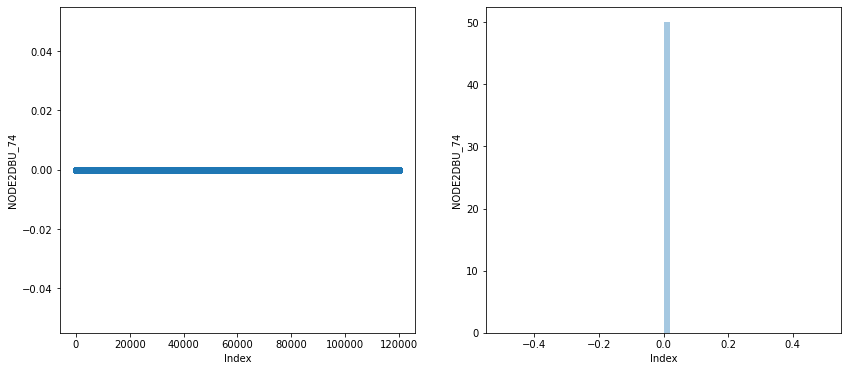

NODE2DBU_74 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


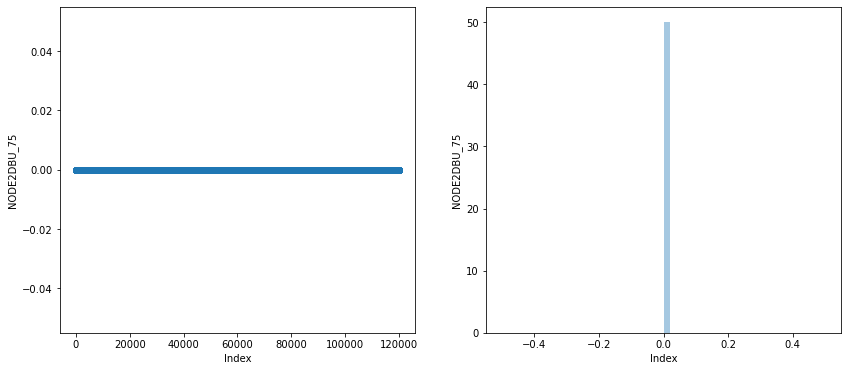

NODE2DBU_75 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


NODE2DBU_76 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_77 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


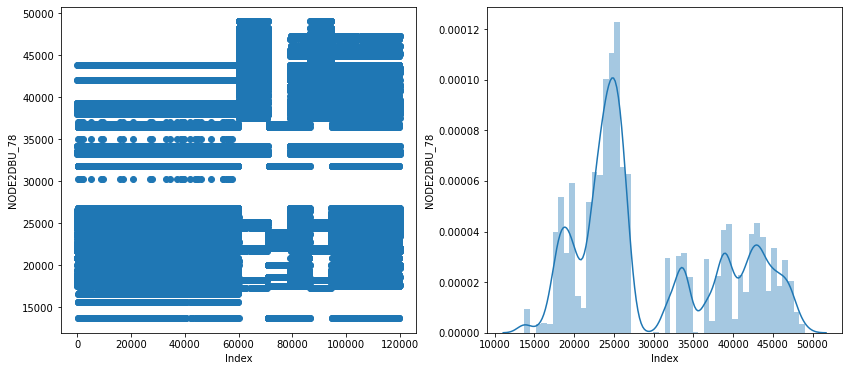

NODE2DBU_78 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


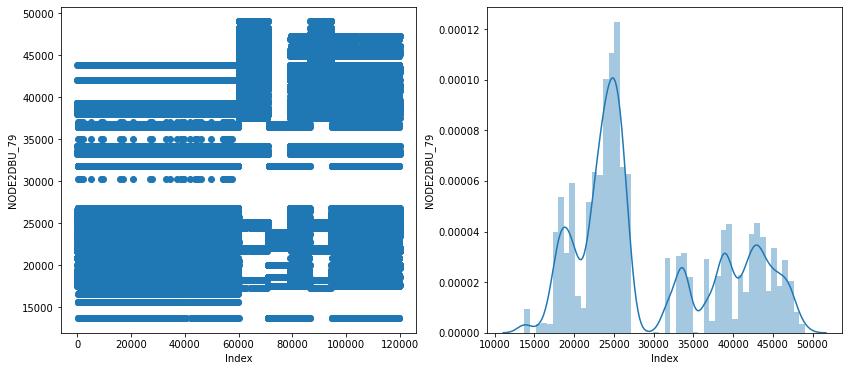

NODE2DBU_79 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


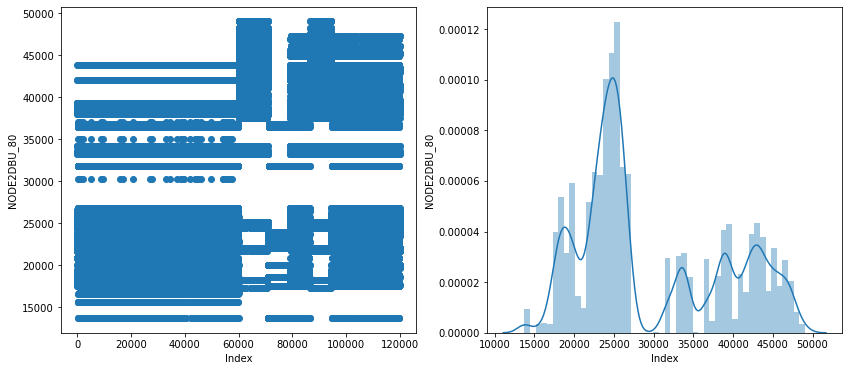

NODE2DBU_80 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


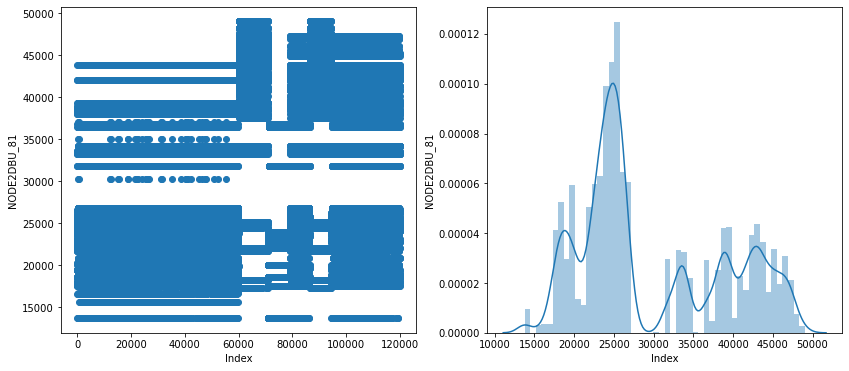

NODE2DBU_81 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


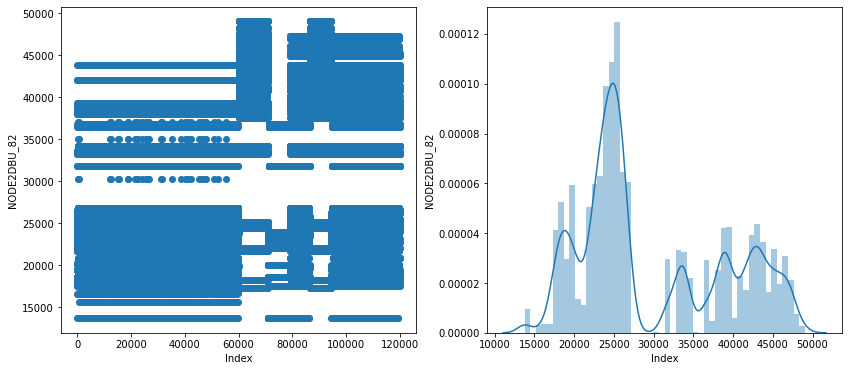

NODE2DBU_82 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


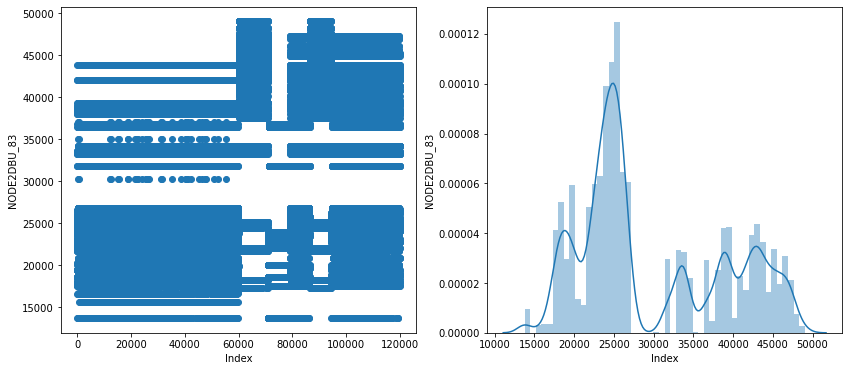

NODE2DBU_83 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


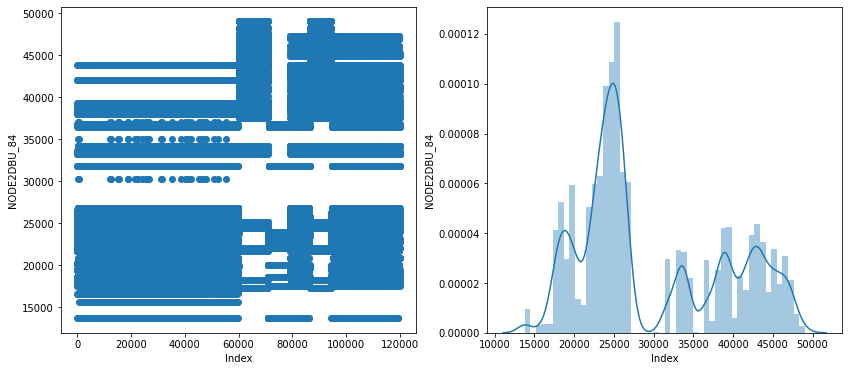

NODE2DBU_84 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_85 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NODE2DBU_86 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


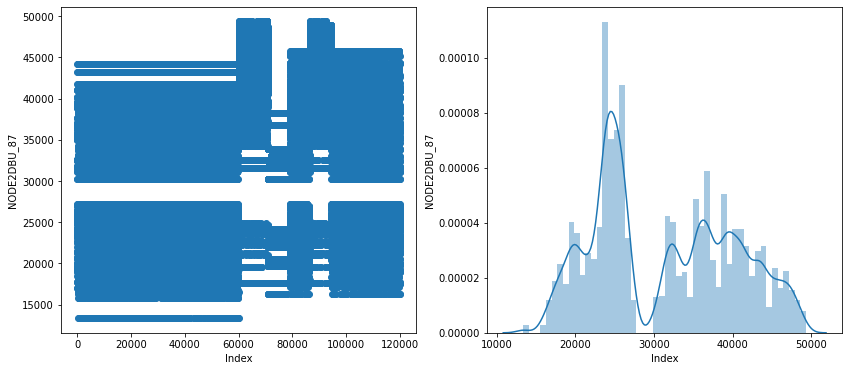

NODE2DBU_87 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


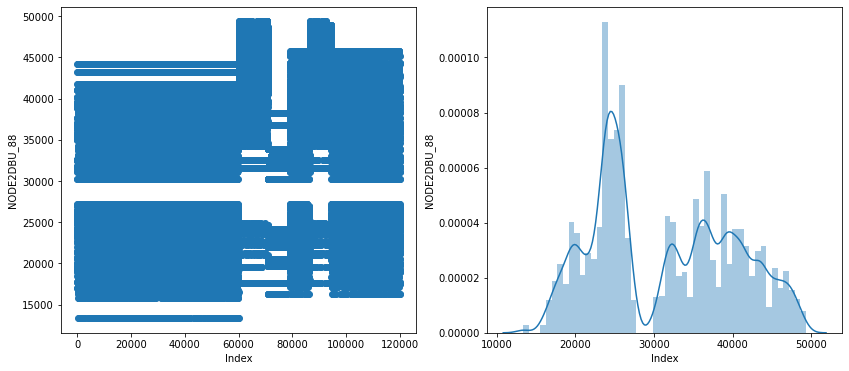

NODE2DBU_88 特征值的数量为 495


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


NODE2DBU_89 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


NODE2DBU_90 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


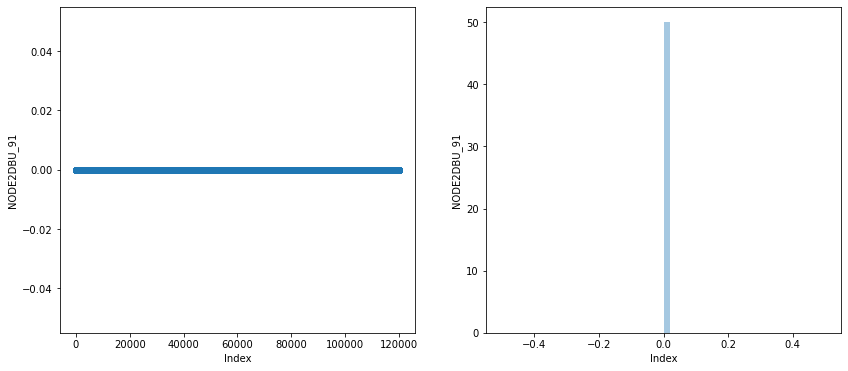

NODE2DBU_91 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


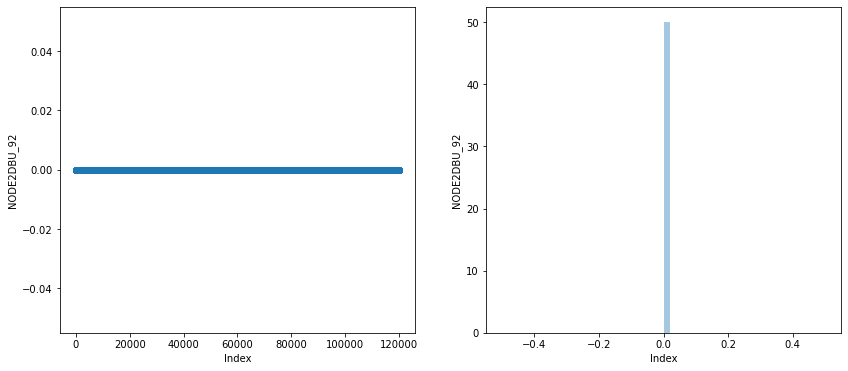

NODE2DBU_92 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


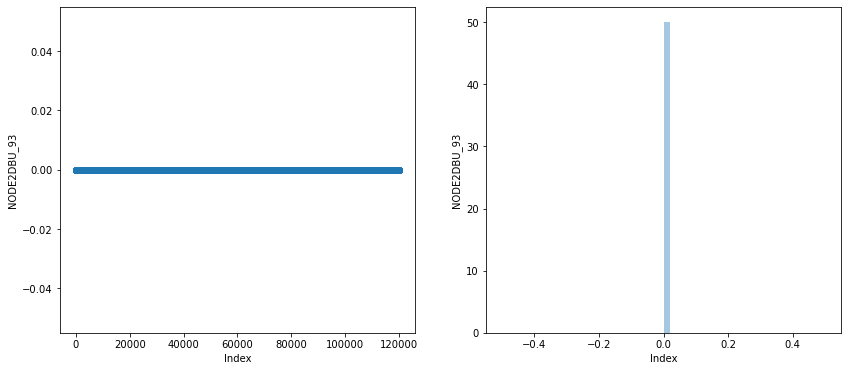

NODE2DBU_93 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


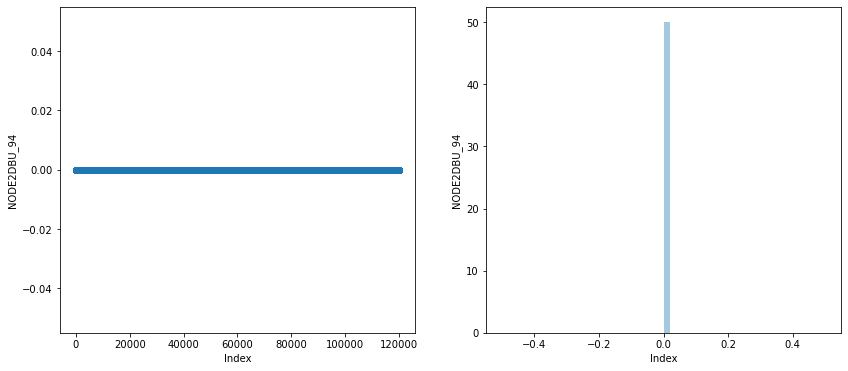

NODE2DBU_94 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


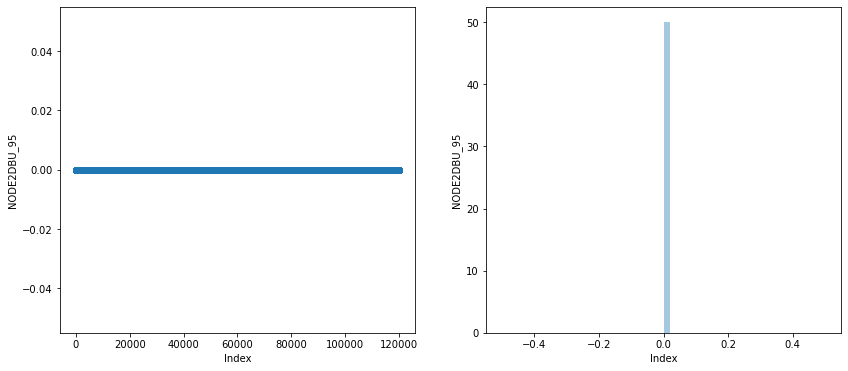

NODE2DBU_95 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


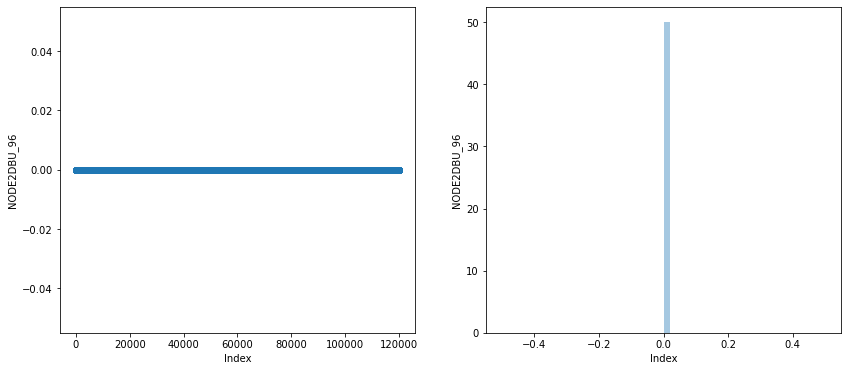

NODE2DBU_96 特征值的数量为 1


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


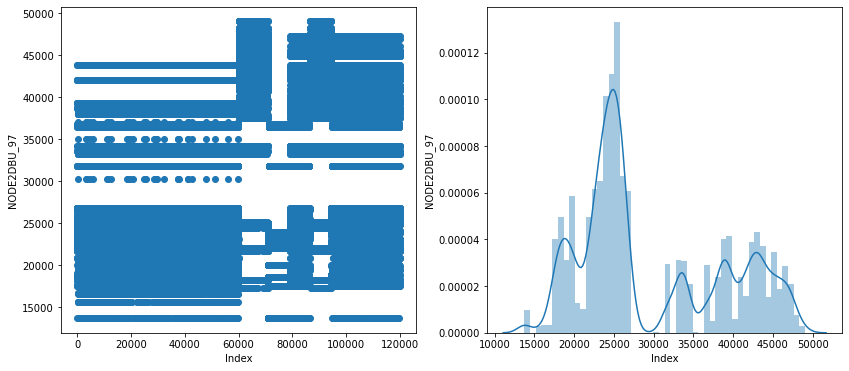

NODE2DBU_97 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


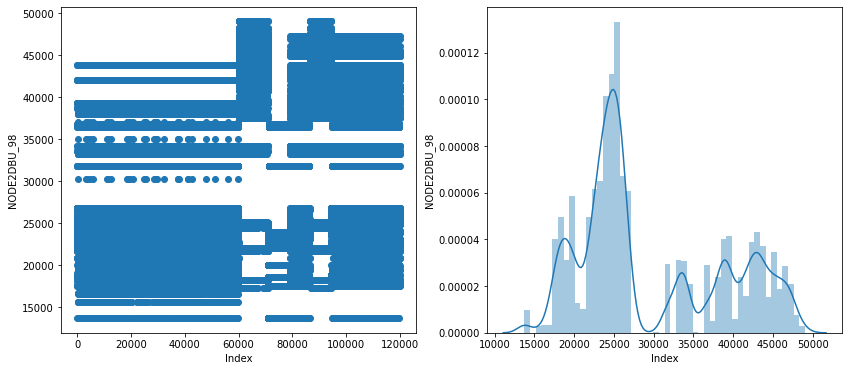

NODE2DBU_98 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


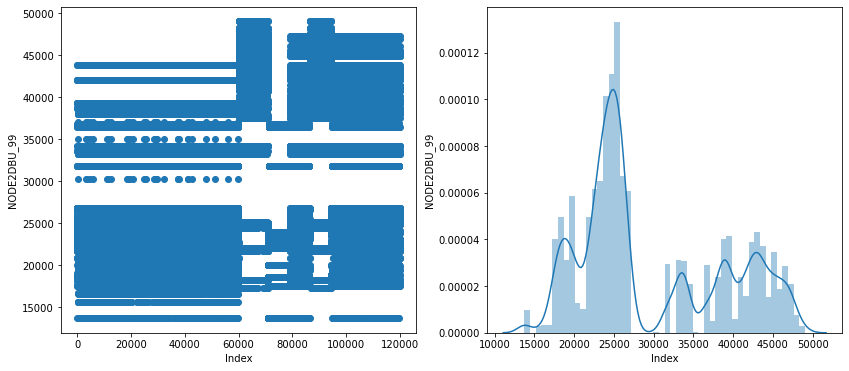

NODE2DBU_99 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


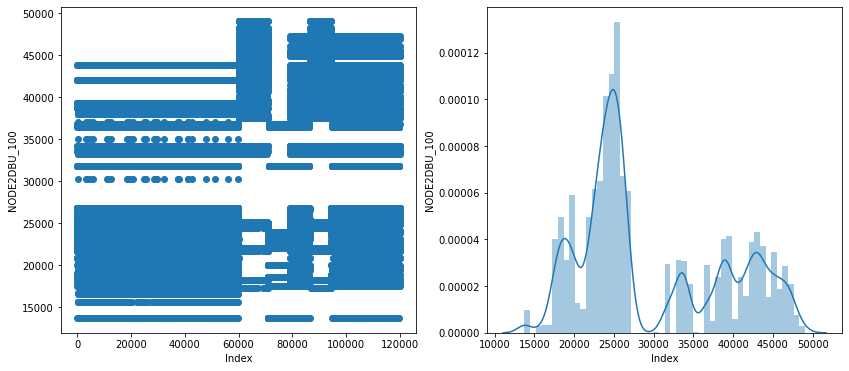

NODE2DBU_100 特征值的数量为 334


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


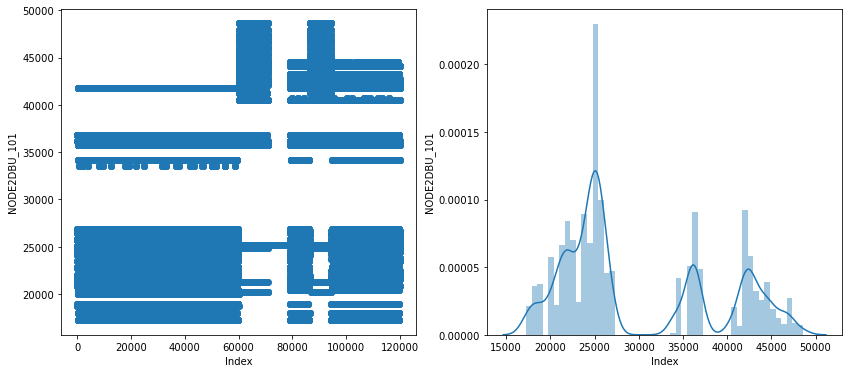

NODE2DBU_101 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


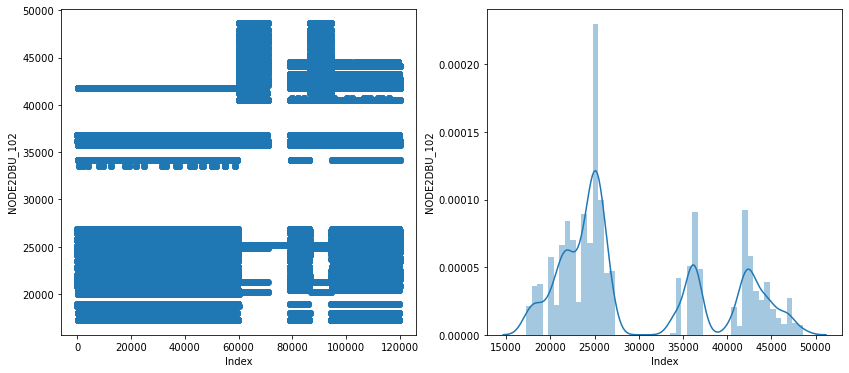

NODE2DBU_102 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


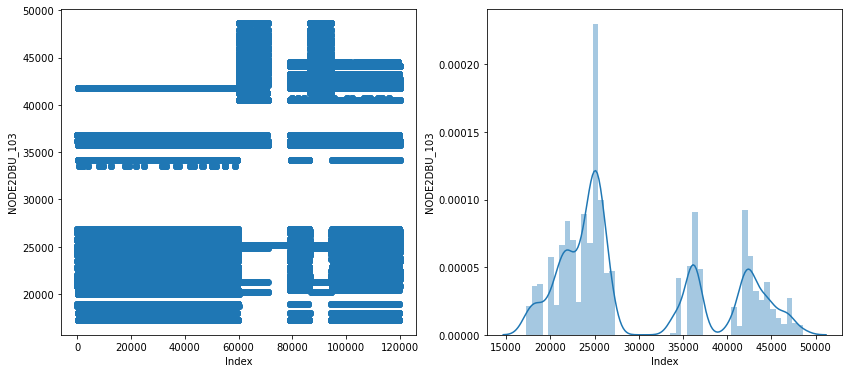

NODE2DBU_103 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


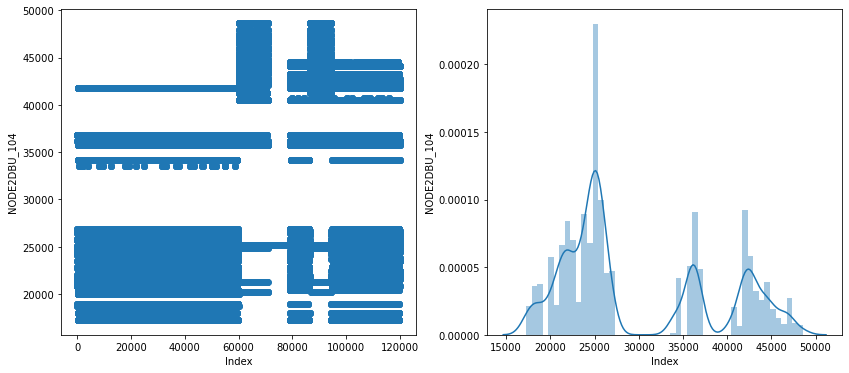

NODE2DBU_104 特征值的数量为 86


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


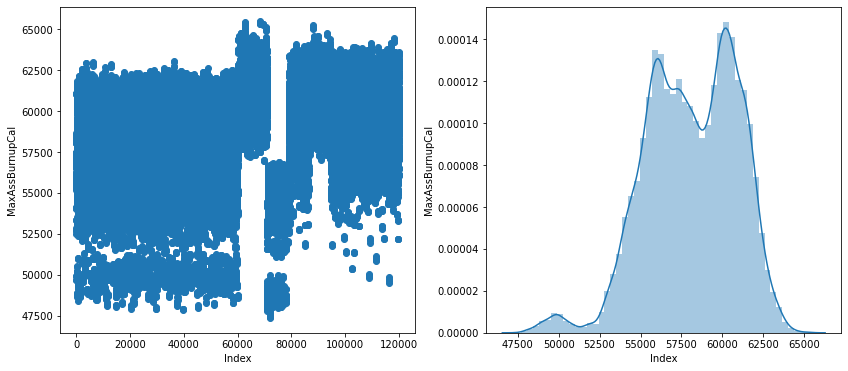

MaxAssBurnupCal 特征值的数量为 13149


/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


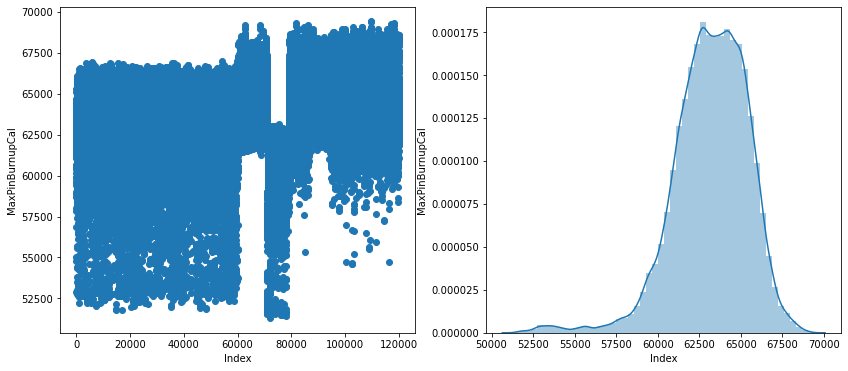

MaxPinBurnupCal 特征值的数量为 62045


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

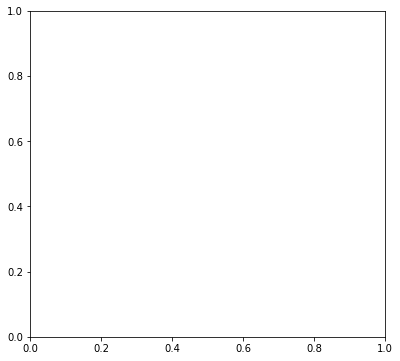

In [10]:
for col in all_data.columns:
    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.scatter(pre_data.index, pre_data[col])
    plt.xlabel('Index')
    plt.ylabel(col)
    
    plt.subplot(1,2,2)
    sns.distplot(pre_data[col], bins=None, hist=True, kde=True)
    plt.xlabel('Index')
    plt.ylabel(col)

    plt.show()
    
    print('{} 特征值的数量为 {}'.format(col, pre_data[col].nunique()))
    
    

In [11]:
corrmat = all_data.corr(method='spearman')
df_corrmat = pd.DataFrame(corrmat.copy())
df_corrmat

kinf_1    kinf_2    kinf_3    kinf_4    kinf_5  \
kinf_1                    1.000000  0.358887  0.349550  0.345190 -0.188469   
kinf_2                    0.358887  1.000000  0.353298  0.353248 -0.184420   
kinf_3                    0.349550  0.353298  1.000000  0.342342 -0.183515   
kinf_4                    0.345190  0.353248  0.342342  1.000000 -0.177098   
kinf_5                   -0.188469 -0.184420 -0.183515 -0.177098  1.000000   
...                            ...       ...       ...       ...       ...   
NODE2DBU__max_mean_delta  0.157240  0.145171  0.149065  0.141644 -0.463813   
NODE2DBU__min_mean_delta  0.575212  0.567230  0.573273  0.572170 -0.085202   
NODE2DBU_skew             0.364639  0.368758  0.367557  0.355687 -0.457715   
NODE2DBU_sum             -0.575212 -0.567230 -0.573273 -0.572170  0.085202   
NODE2DBU_mad                   NaN       NaN       NaN       NaN       NaN   

                            kinf_6    kinf_7    kinf_8    kinf_9   kinf_10  \
kinf_1                   -0.188469  0.352264 -0.188469 -0.188469 -0.188469   
kinf_2                   -0.184420  0.357729 -0.184420 -0.184420 -0.184420   
kinf_3                   -0.183515  0.352469 -0.183515 -0.183515 -0.183515   
kinf_4                   -0.177098  0.346949 -0.177098 -0.177098 -0.177098   
kinf_5                    1.000000 -0.182470  1.000000  1.000000  1.000000   
...                            ...       ...       ...       ...       ...   
NODE2DBU__max_mean_delta -0.463813  0.144805 -0.463813 -0.463813 -0.463813   
NODE2DBU__min_mean_delta -0.085202  0.579836 -0.085202 -0.085202 -0.085202   
NODE2DBU_skew            -0.457715  0.365528 -0.457715 -0.457715 -0.457715   
NODE2DBU_sum              0.085202 -0.579836  0.085202  0.085202  0.085202   
NODE2DBU_mad                   NaN       NaN       NaN       NaN       NaN   

                          ...  NODE2DBU_median  NODE2DBU_mean  NODE2DBU_max  \
kinf_1                    ...        -0.500528      -0.575212     -0.524203   
kinf_2                    ...        -0.524209      -0.567230     -0.518536   
kinf_3                    ...        -0.507816      -0.573273     -0.524835   
kinf_4                    ...        -0.502541      -0.572170     -0.525410   
kinf_5                    ...         0.090937       0.085202      0.077860   
...                       ...              ...            ...           ...   
NODE2DBU__max_mean_delta  ...        -0.144636      -0.031255      0.307507   
NODE2DBU__min_mean_delta  ...        -0.799349      -1.000000     -0.864746   
NODE2DBU_skew             ...        -0.570452      -0.381078     -0.155529   
NODE2DBU_sum              ...         0.799349       1.000000      0.864746   
NODE2DBU_mad              ...              NaN            NaN           NaN   

                          NODE2DBU_min  NODE2DBU_delta  \
kinf_1                             NaN       -0.524203   
kinf_2                             NaN       -0.518536   
kinf_3                             NaN       -0.524835   
kinf_4                             NaN       -0.525410   
kinf_5                             NaN        0.077860   
...                                ...             ...   
NODE2DBU__max_mean_delta           NaN        0.307507   
NODE2DBU__min_mean_delta           NaN       -0.864746   
NODE2DBU_skew                      NaN       -0.155529   
NODE2DBU_sum                       NaN        0.864746   
NODE2DBU_mad                       NaN             NaN   

                          NODE2DBU__max_mean_delta  NODE2DBU__min_mean_delta  \
kinf_1                                    0.157240                  0.575212   
kinf_2                                    0.145171                  0.567230   
kinf_3                                    0.149065                  0.573273   
kinf_4                                    0.141644                  0.572170   
kinf_5                                   -0.463813                 -0.085202   
...                         

In [13]:
df_corrmat_ass = df_corrmat.sort_values(by=['MaxAssBurnupCal'])
df_corrmat_pin = df_corrmat.sort_values(by=['MaxPinBurnupCal'])
df_corrmat_pin['MaxPinBurnupCal'].head(30)

kinf_min                   -0.642853
kinf_skew                  -0.641934
NODE2DBU__min_mean_delta   -0.594977
kinf_mean                  -0.566506
kinf_sum                   -0.566497
kinf_11                    -0.447809
kinf_15                    -0.434485
kinf_median                -0.430334
gd157_sum                  -0.381680
gd157_mean                 -0.381481
kinf_20                    -0.373737
kinf__min_mean_delta       -0.348629
gd157_23                   -0.336855
gd157_10                   -0.336855
gd157_12                   -0.336855
gd157_14                   -0.336855
gd157_16                   -0.336855
gd157_17                   -0.336855
gd157_19                   -0.336855
gd157_6                    -0.336855
gd157_24                   -0.336855
gd157_9                    -0.336855
gd157_median               -0.331083
kinf_13                    -0.329823
kinf_3                     -0.307631
kinf_26                    -0.306469
kinf_18                    -0.305862
k

In [14]:
df_corrmat_pin['MaxAssBurnupCal'].head(30)

kinf_min                   -0.713479
kinf_skew                  -0.709889
NODE2DBU__min_mean_delta   -0.679956
kinf_mean                  -0.649284
kinf_sum                   -0.649289
kinf_11                    -0.519159
kinf_15                    -0.461387
kinf_median                -0.509114
gd157_sum                  -0.392040
gd157_mean                 -0.391912
kinf_20                    -0.454337
kinf__min_mean_delta       -0.358381
gd157_23                   -0.343532
gd157_10                   -0.343532
gd157_12                   -0.343532
gd157_14                   -0.343532
gd157_16                   -0.343532
gd157_17                   -0.343532
gd157_19                   -0.343532
gd157_6                    -0.343532
gd157_24                   -0.343532
gd157_9                    -0.343532
gd157_median               -0.337726
kinf_13                    -0.386814
kinf_3                     -0.368104
kinf_26                    -0.361812
kinf_18                    -0.363476
k

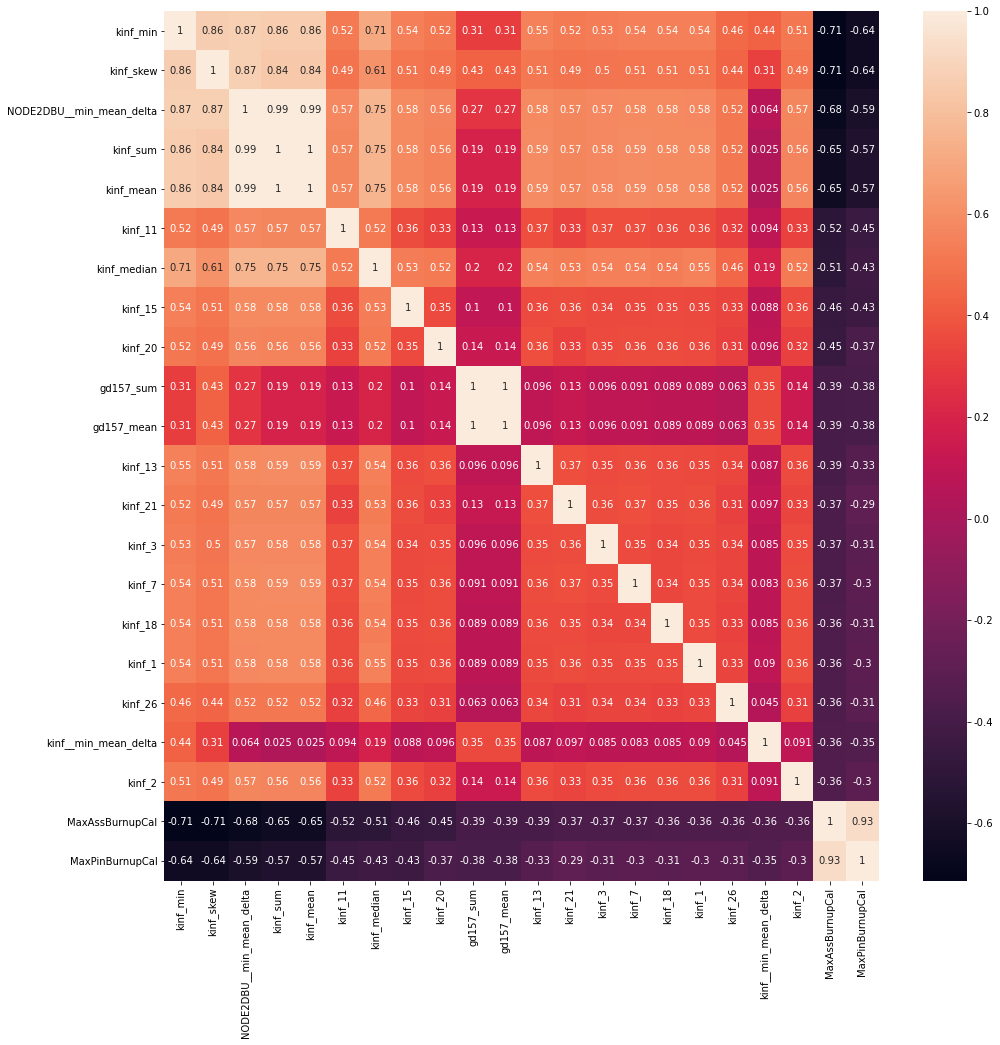

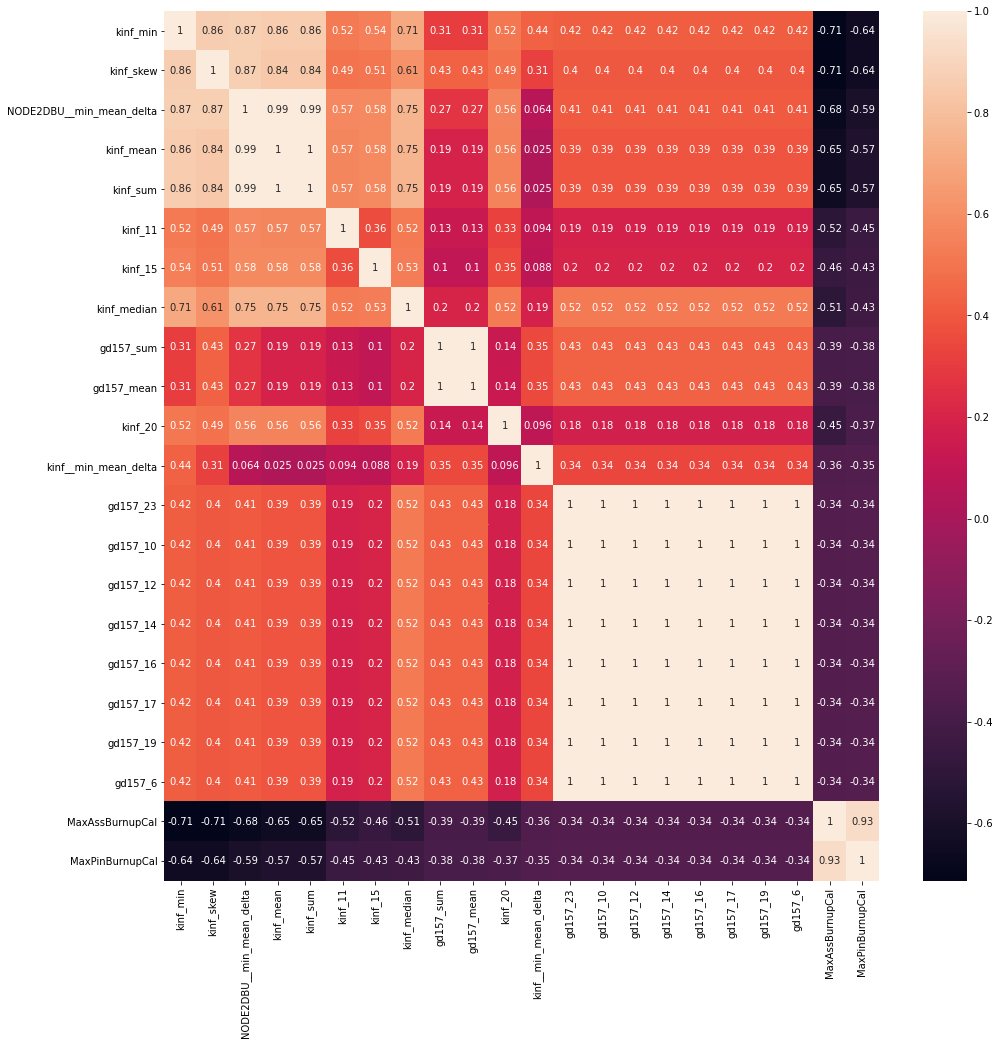

In [15]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

for y_col in ['MaxAssBurnupCal', 'MaxPinBurnupCal']:
    
    imp_num = 20
    df_corr = df_corrmat.sort_values(by=y_col)
    cols = df_corr.head(imp_num).index.to_list() + ['MaxAssBurnupCal', 'MaxPinBurnupCal']
    plt.figure(figsize=(16,16))
    sns.heatmap(df_corr.loc[cols,cols], annot=True)
    plt.show()



In [16]:
def plt_error(y_pred, y_test, column):
        plt.figure(figsize=(16,9))
        plt.errorbar(np.arange(len(y_pred)), y_pred, yerr = 10)
        plt.errorbar(np.arange(len(y_test)), y_test, yerr = 10)
        plt.xlabel('Serial No.')
        plt.ylabel(column)
        plt.legend(['Predict', 'True'])
        plt.show()
        plt.figure(figsize=(16,9))
        plt.scatter(np.arange(len(y_test)), (y_pred-np.array(y_test)))
        plt.xlabel('Serial No.')
        plt.ylabel(column+' error')
        plt.show()

In [17]:
feat_dic = {
    
#     'MaxAssBurnupCal': list(set(df_corrmat_ass.head(30).index.tolist()).difference(new_ass_cols)),
    'MaxAssBurnupCal': df_corrmat_ass.head(30).index.tolist(),
    'MaxPinBurnupCal': df_corrmat_ass.head(30).index.tolist()
#     'MaxPinBurnupCal': [c for c in effect_col if c not in ['MaxAssBurnupCal', 'MaxAssBurnupCal_range', 
#                                                            'MaxAssBurnupCal_label', 'MaxPinBurnupCal',
#                                                            'MaxPinBurnupCal_range',  'MaxPinBurnupCal_label']]
}
print(len(feat_dic['MaxAssBurnupCal']))
print(len(feat_dic['MaxPinBurnupCal']))
feat_dic['MaxAssBurnupCal']

30
30


['kinf_min',
 'kinf_skew',
 'NODE2DBU__min_mean_delta',
 'kinf_sum',
 'kinf_mean',
 'kinf_11',
 'kinf_median',
 'kinf_15',
 'kinf_20',
 'gd157_sum',
 'gd157_mean',
 'kinf_13',
 'kinf_21',
 'kinf_3',
 'kinf_7',
 'kinf_18',
 'kinf_1',
 'kinf_26',
 'kinf__min_mean_delta',
 'kinf_2',
 'kinf_4',
 'kinf_25',
 'gd157_24',
 'gd157_17',
 'gd157_12',
 'gd157_10',
 'gd157_9',
 'gd157_19',
 'gd157_6',
 'gd157_16']

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import lightgbm as lgb
import xgboost as xgb

input_col = [c for c in all_data.columns if c not in ['MaxAssBurnupCal', 'MaxAssBurnupCal_range', 
                                                           'MaxAssBurnupCal_label', 'MaxPinBurnupCal',
                                                           'MaxPinBurnupCal_range',  'MaxPinBurnupCal_label']]
# # input_col = df_corrmat_pin.head(30).index.tolist()
output_col = ['MaxAssBurnupCal', 'MaxPinBurnupCal']

K = 5
seed = 2020

X_pre_train, X_test, y_pre_train, y_test = train_test_split(all_data[input_col], all_data[output_col], 
                                                           random_state=seed, train_size=0.9, 
                                                           test_size=0.1)

skf = KFold(n_splits=K, shuffle=True, random_state=seed)
xgb_params = {
                'booster': 'gbtree',
                'eval_metric': 'rmse',
#                 'gamma': 1,
#                 'min_child_weight': 1.5,
                'max_depth': 10,
#                 'lambda': 10,
                'subsample': 0.9,
#                 'colsample': 0.7,
#                 'colsample_bytree': 0.7,
#                 'colsample_bylevel': 0.7,
                'eta': 0.1,
                'tree_method': 'exact',
                'seed': 2020,
            }

In [ ]:


def model_predict(X_train, y_train, X_test, burnup, df_feat_imp, train_pred, test_pred):
    
    predictions = np.zeros(len(X_test))
    loss_temp = np.zeros(K)
    print('训练数据的shape为：', X_train.shape)
    
    for i, (train_index, val_index) in enumerate(skf.split(X_train,y_train)):
        print("fold {}".format(i+1))
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        xgb_train = xgb.DMatrix(X_tr,label=y_tr)
        xgb_val = xgb.DMatrix(X_val,label=y_val)
        xgb_test = xgb.DMatrix(X_test)
        num_round = 8000
        watchlist = [(xgb_train, 'train'), (xgb_val, 'eval')]
        clf = xgb.train(xgb_params, xgb_train, num_boost_round = num_round, evals = watchlist, verbose_eval=50, 
                        early_stopping_rounds = 50)
        print('best iteration = ',clf.best_iteration)
        print("*"*100)
        predictions += clf.predict(xgb_test, ntree_limit=clf.best_ntree_limit) / skf.n_splits
        
        y_val_pred = clf.predict(xgb_val, ntree_limit=clf.best_ntree_limit)
        
        # 预测所有训练集的结果
        train_pred[burnup] += clf.predict(xgb.DMatrix(X_pre_train[feat_dic[burnup]]), ntree_limit=clf.best_ntree_limit) / skf.n_splits
        
        test_pred[burnup] = predictions
        
        xgb_score = mean_absolute_error(y_val_pred, y_val)
        plt_error(y_val_pred, y_val, burnup)
        print('XGB均差得分为：', xgb_score)
        
        plt.figure(figsize=(16,9))
        ax = xgb.plot_importance(clf, max_num_features=20, importance_type='gain')#max_features表示最多展示出前10个重要性特征，可以自行设置
        plt.show()
        
#         booster = clf.booster
#         importance = clf.feature_importance(importance_type='gain')
#         feature_name = clf.feature_name()
#         feature_importance = pd.DataFrame({'feature_name_'+burnup:feature_name,'importance_'+burnup:importance} )
                
    return predictions, train_pred, test_pred




In [ ]:

tmp_pred = y_pre_train.copy()
tmp_test = y_test.copy()
for col in tmp_pred:
    tmp_pred[col] = 0
    tmp_test[col] = 0

pred_test = pd.DataFrame(np.zeros((len(X_test),2)), columns=output_col)
df_feat_imp = pd.DataFrame()

for burnup in ['MaxPinBurnupCal']:
    
    pred_arr, y_train_pred, y_test_pred = model_predict(X_pre_train[feat_dic[burnup]], y_pre_train[burnup], 
                                                              X_test[feat_dic[burnup]], burnup, df_feat_imp, tmp_pred, tmp_test)

    pred_test[burnup] = pred_arr
#     df_feat_imp = pd.concat([df_feat_imp, feature_importance], axis=1)

In [ ]:
y_test_pred

In [ ]:
y_train_pred

In [ ]:
pred_test

In [ ]:
for col in pred_test.columns:
    plt_error(pred_test[col], y_test[col], col)
    score = mean_absolute_error(pred_test[col], y_test[col])
    print('LGB1均差得分为：', score)
    

In [ ]:
def CalError(pred, test):
    
    col_name = []
    for col in pred.columns:
        col_name.append(col+'_pred')
    for col in test.columns:
        col_name.append(col+'_test')  
    
    pred.index = test.index
#     test.reset_index(drop=True, inplace=True)
    pred_error = pd.concat([pred,test], axis=1)
    print(pred_error)
    pred_error.columns = col_name
    
    error_col = []
    for col in pred.columns:
        pred_error[col + '_error'] = np.array(pred[col]) - np.array(test[col])
        error_col.append(col + '_error')
    bin_range = np.linspace(0,1000,11).tolist() + [2000, 3000, 4000, 5000, 10000]
    bin_label = np.linspace(1,15,15).tolist()
    
    range_col = []
    for col in error_col:
        pred_error[col+'_range'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range
                                        )
        range_col.append(col+'_range')
        pred_error[col+'_label'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range,
                                        labels=bin_label
                                        )
        range_col.append(col+'_label')
        
    for col in [c for c in range_col if '_label' not in c]:
        print(pred_error[col].value_counts())
        
    return pred_error
        
pred_test_error = CalError(pred_test[output_col], y_test[output_col])
pred_test_error
        

In [ ]:
ass_pred_outlier_list = []
pin_pred_outlier_list = []
threshold_value = 1000

for index,row in pred_test_error.iterrows():
#     if abs(pred_error.loc[index, 'MaxAssBurnupCal_label_error']) >= threshold_value:
#         ass_pred_outlier_list.append(pred_error.loc[index, 'index'])
#         print('MaxAss误差大于{}的行号是{}。'.format(threshold_value, pred_error.loc[index, 'index']))
        
    if abs(pred_error.loc[index, 'MaxPinBurnupCal_error']) >= threshold_value:
        pin_pred_outlier_list.append(index)
        print('MaxPin误差大于{}的行号是{}。'.format(threshold_value, index))
            
# ass_pred_outlier = pre_data.loc[ass_pred_outlier_list, :]
pin_pred_outlier = pre_data.loc[pin_pred_outlier_list, :]
pin_pred_outlier

In [29]:
X_test

kinf_1   kinf_2   kinf_3   kinf_4  kinf_5  kinf_6   kinf_7  kinf_8  \
47057   1.15324  1.16130  1.17093  1.17028  1.4279  1.1821  1.15472  1.4279   
24481   1.20422  1.21566  1.23268  1.15049  1.4279  1.1821  1.21509  1.4279   
108820  1.06622  1.06214  1.15078  1.15049  1.4279  1.1821  1.19730  1.4279   
21146   1.20287  1.17208  1.07572  1.17326  1.4279  1.1821  1.16216  1.4279   
116533  1.07459  1.08161  1.07050  1.19755  1.4279  1.1821  1.17028  1.4279   
...         ...      ...      ...      ...     ...     ...      ...     ...   
86734   1.02524  1.04861  1.01820  1.02833  1.4279  1.1821  1.07040  1.4279   
9793    1.16759  1.19073  1.10912  1.16118  1.4279  1.1821  1.18821  1.4279   
11389   1.17093  1.08021  1.21918  1.16708  1.4279  1.1821  1.20287  1.4279   
46670   1.07771  1.17208  1.16452  1.20287  1.4279  1.1821  1.16099  1.4279   
12642   1.15988  1.18516  1.18821  1.15324  1.4279  1.1821  1.09896  1.4279   

        kinf_9  kinf_10  ...  NODE2DBU_median  NODE2DBU_mean  NODE2DBU_max  \
47057   1.1821   1.1821  ...          17247.0   13754.913462       40983.0   
24481   1.1821   1.1821  ...          16815.5   11790.230769       26995.0   
108820  1.1821   1.1821  ...          20235.0   15442.942308       44942.0   
21146   1.1821   1.1821  ...          17953.0   13906.125000       44178.0   
116533  1.1821   1.1821  ...          21032.5   17544.009615       45143.0   
...        ...      ...  ...              ...            ...           ...   
86734   1.1821   1.1821  ...          39236.5   23779.817308       47974.0   
9793    1.1821   1.1821  ...          18973.5   14687.307692       41581.0   
11389   1.1821   1.1821  ...          17247.0   14269.625000       43252.0   
46670   1.1821   1.1821  ...          20567.0   14315.855769       43252.0   
12642   1.1821   1.1821  ...          18946.5   14418.269231       41581.0   

        NODE2DBU_min  NODE2DBU_delta  NODE2DBU__max_mean_delta  \
47057            0.0         40983.0              27228.086538   
24481            0.0         26995.0              15204.769231   
108820           0.0         44942.0              29499.057692   
21146            0.0         44178.0              30271.875000   
116533           0.0         45143.0              27598.990385   
...              ...             ...                       ...   
86734            0.0         47974.0              24194.182692   
9793             0.0         41581.0              26893.692308   
11389            0.0         43252.0              28982.375000   
46670            0.0         43252.0              28936.144231   
12642            0.0         41581.0              27162.730769   

        NODE2DBU__min_mean_delta  NODE2DBU_skew  NODE2DBU_sum  NODE2DBU_mad  
47057              -13754.913462       0.187338     1430511.0           NaN  
24481              -11790.230769       0.003312     1226184.0           NaN  
108820             -15442.942308       0.208120     1606066.0           NaN  
21146              -13906.125000       0.202464     1446237.0           NaN  
116533             -17544.009615       0.190340     1824577.0           NaN  
...                          ...            ...           ...           ...  
86734              -23779.817308      -0.130374     2473101.0           NaN  
9793               -14687.307692       0.218882     1527480.0           NaN  
11389              -14269.625000       0.183167     1484041.0           NaN  
46670              -14315.855769       0.218565     1488849.0           NaN  
12642              -14418.269231       0.187219     1499500.0           NaN  

[12000 rows x 387 columns]

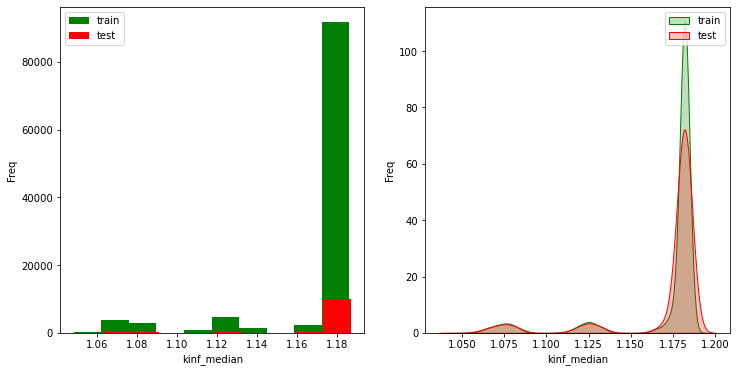

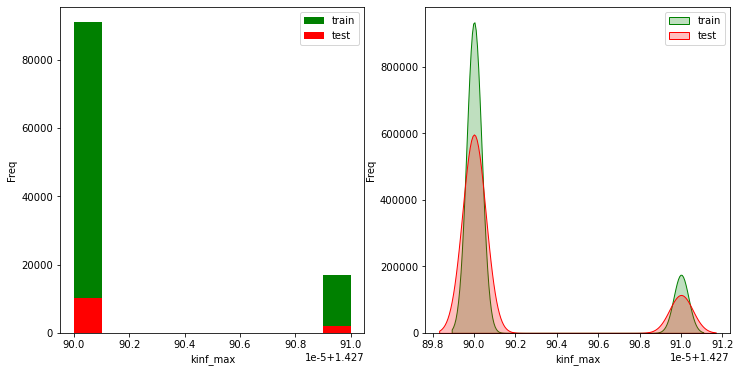

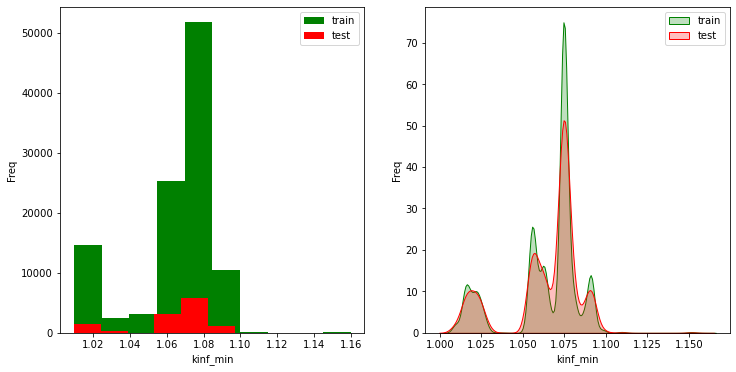

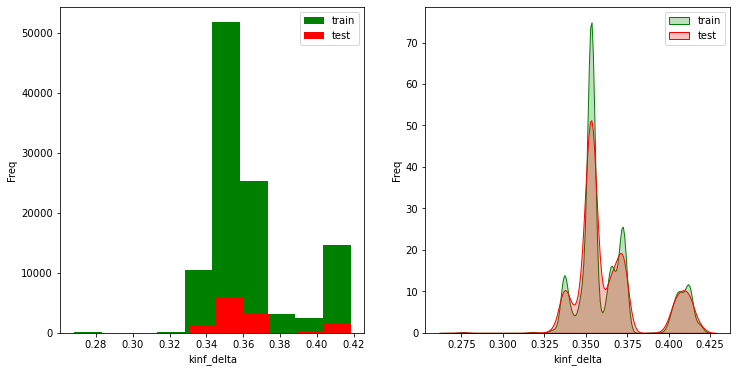

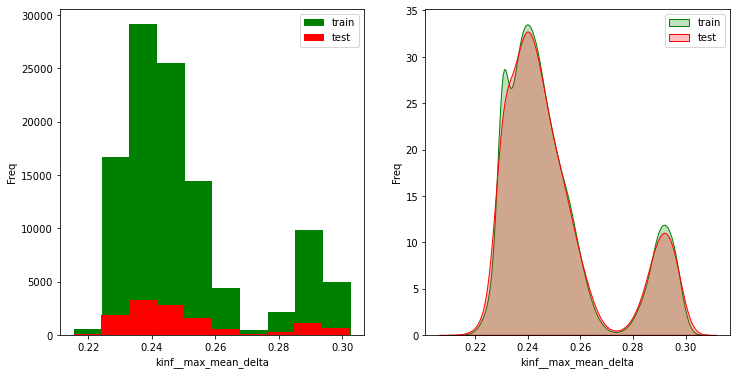

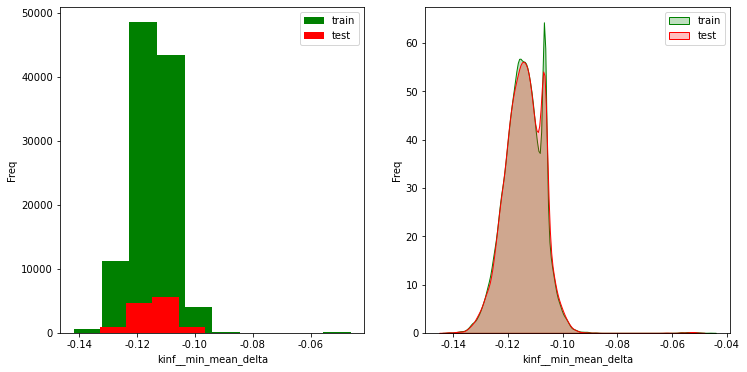

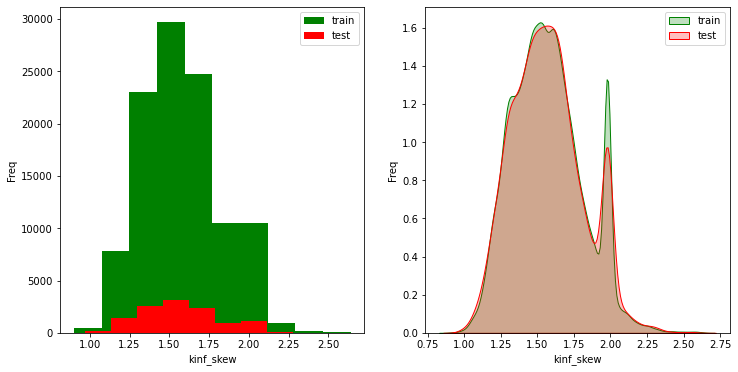

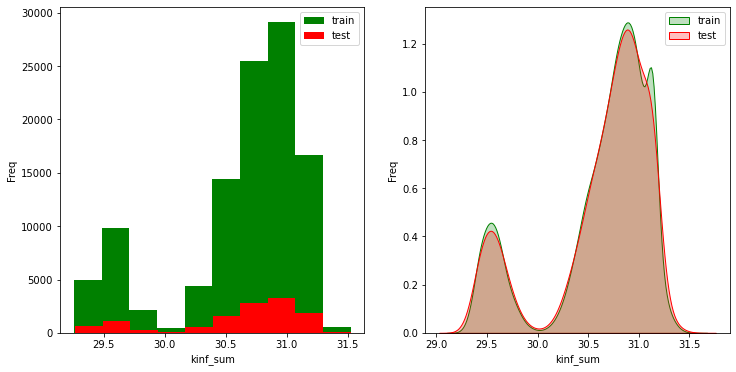

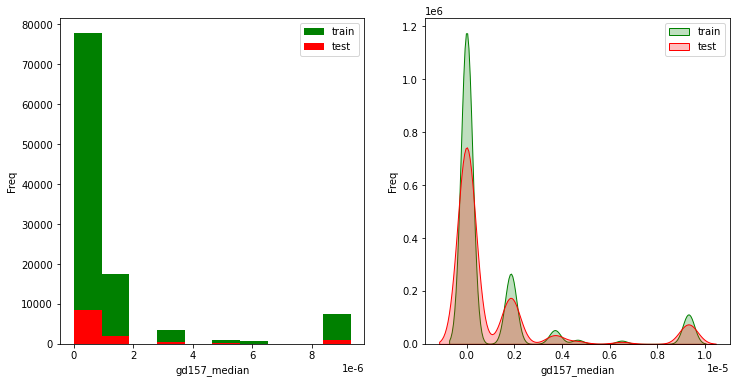

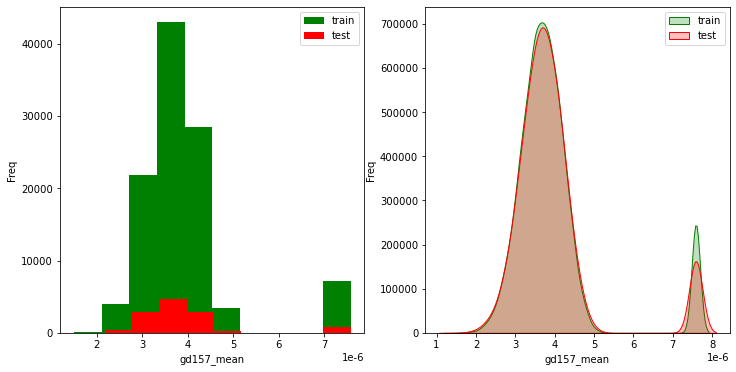

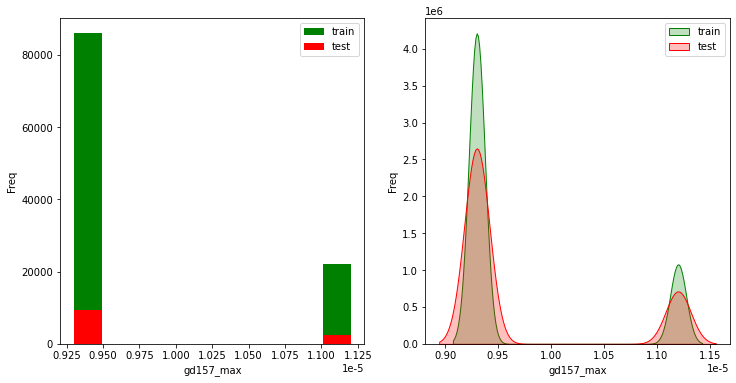

/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


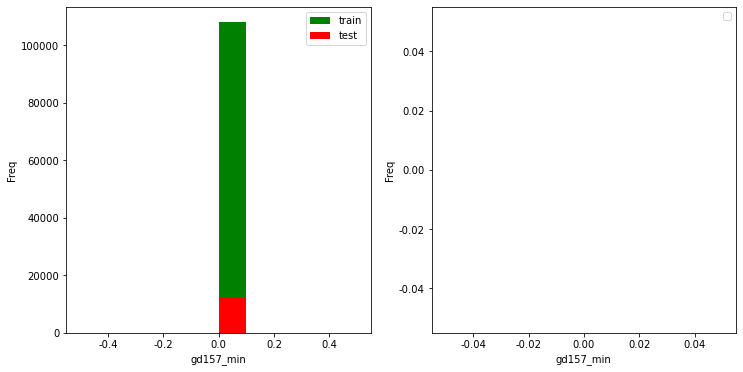

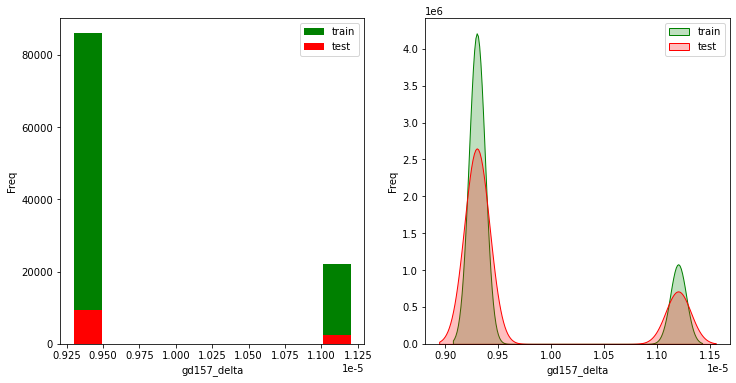

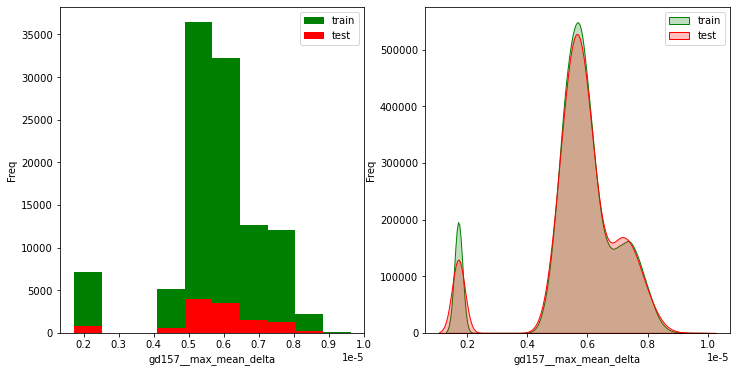

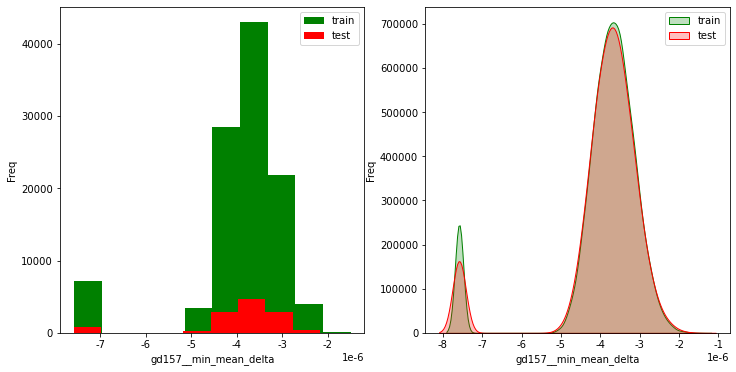

/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


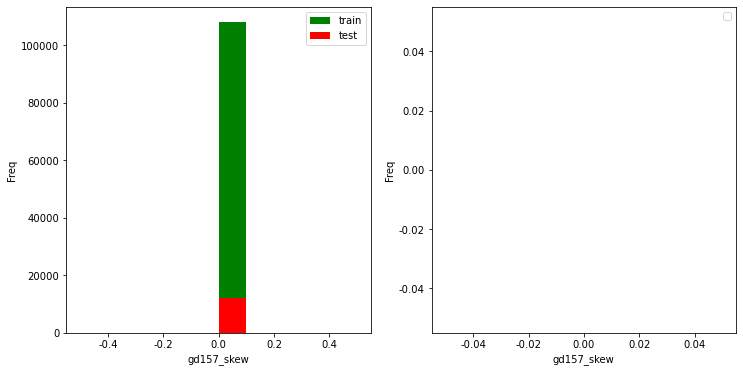

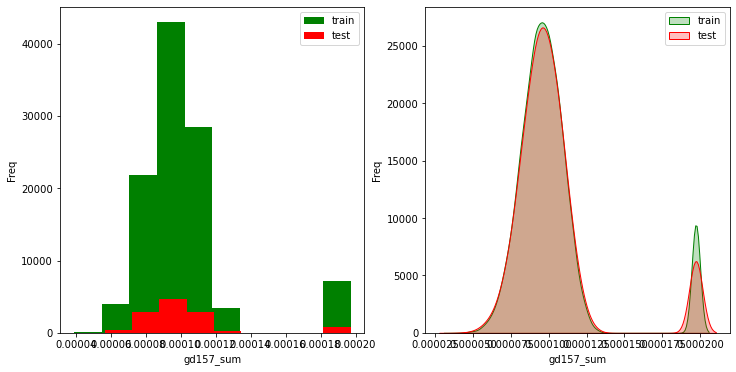

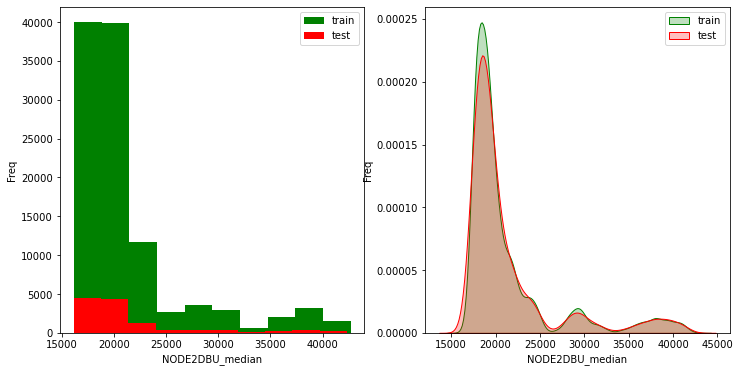

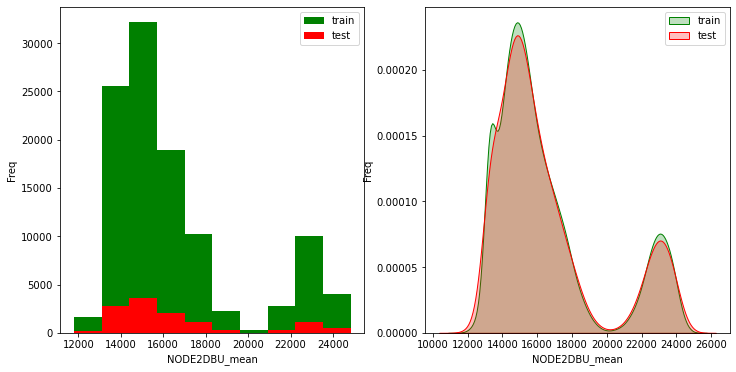

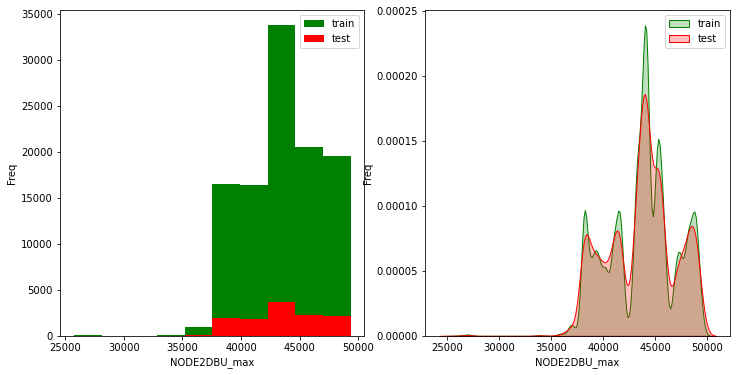

/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/alexhang/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


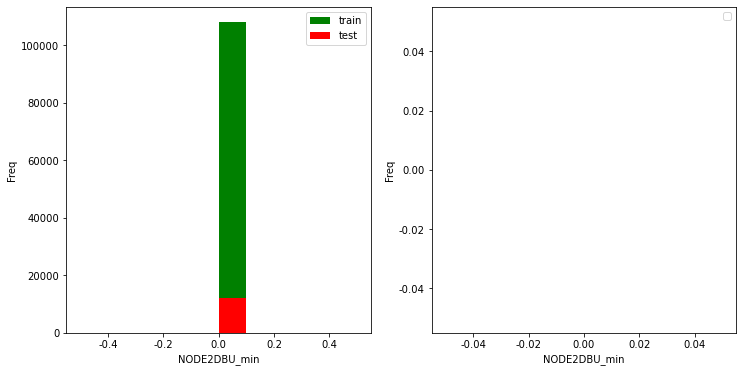

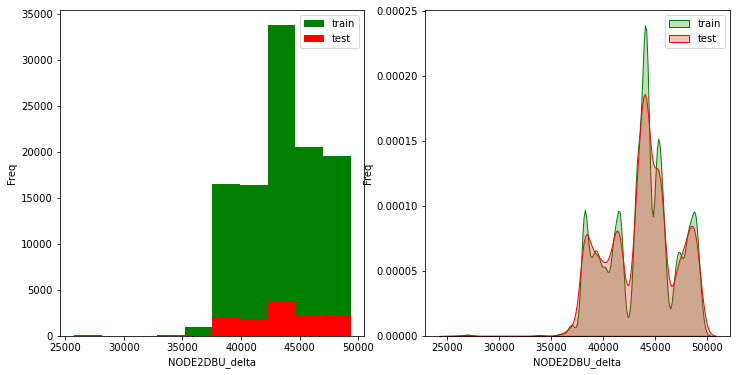

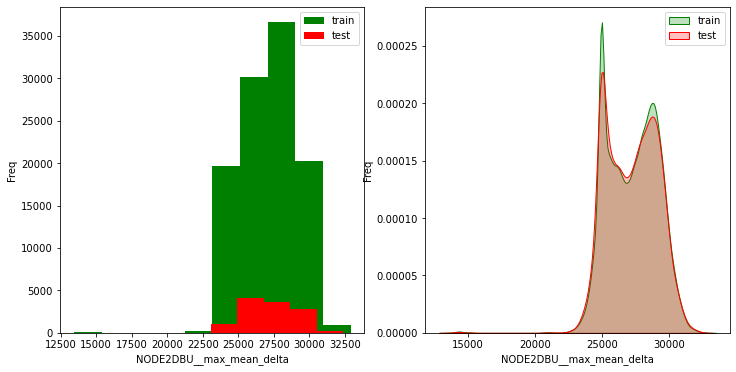

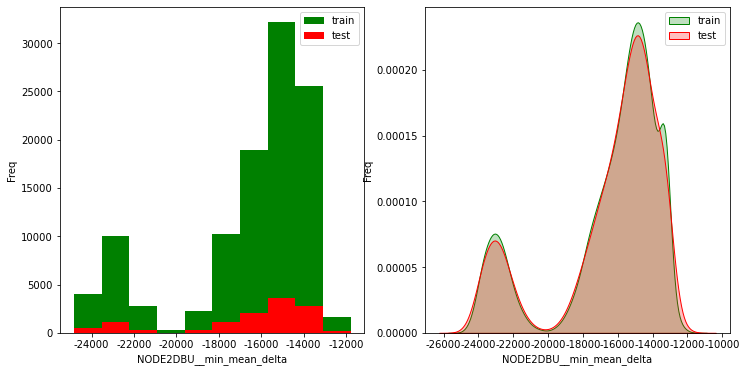

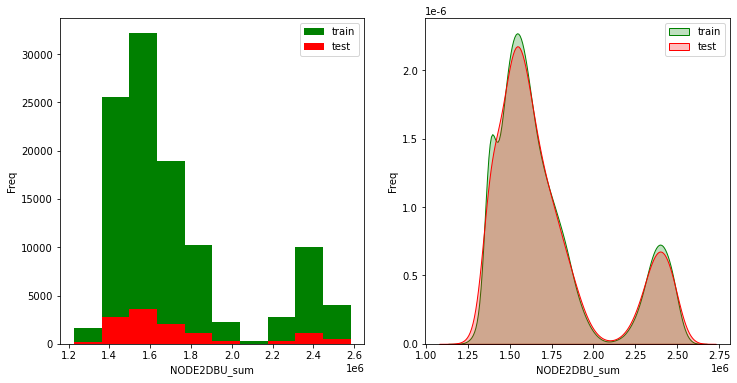

In [26]:
import seaborn as sns

for column in input_col[-30:]:

    if 'mad' not in column:
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        plt.hist(X_pre_train[column], color='g')
        plt.hist(X_test[column], color='r')
        plt.xlabel(column)
        plt.ylabel('Freq')
        plt.legend(['train','test'])

        plt.subplot(1,2,2)
        sns.kdeplot(X_pre_train[column], shade=True, color='g')
        sns.kdeplot(X_test[column], shade=True, color='r')
        plt.xlabel(column)
        plt.ylabel('Freq')
        plt.legend(['train','test'])
        plt.show()